# Introduction: 
In this challenge, we took a deep dive into the media service and original programming production company, Netflix. Investigating genre, reviews, and rating statistics to gain a better understanding of the company's strategy. 

# Main Hypothesis
If a title located on Netflix is classified under the "Action" genre, then it is more likely to have a higher IMDB user rating.

# Step 1: Pulling data from OMDB
Throughout the entire course of our analysis, we will be using the data provided from OMDB's API. 

In [53]:
#import dependencies 
#import dependencies to read the files 
import os 
import csv 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import json
import requests
from config import api_key
from pprint import pprint
import scipy.stats as st


In [4]:
#import api_key
from config import api_key 

In [5]:
# File to Load
file_to_load = "../Data/netflix_titles_CLEANSEDcsv.csv"

# Read Purchasing File and store into Pandas data frame
Netflix_Titles = pd.read_csv(file_to_load)
#drop rows with any missing values 
Netflix_Titles.dropna(how='any')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
...,...,...,...,...,...,...,...,...,...,...,...,...
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...


In [6]:
url = "http://www.omdbapi.com/?t="
api_key = "&apikey=" + api_key

# Creating a loop
- To begin our API pulls, we first created a loop to run through the Netflix Title data set, storing all of the titles in an empty list.
- Next, we ran a test request in order to identify how OMDB listed their data. This allowed us to specify what information we wanted to request.
- We then created another loop to run our stored titles through the API, requesting Title, Genre, IMBD Rating, Number of IMDB votes, and Rating (G, PG, PG-13, R, etc.)

In [7]:
#create empty list to store data
imdb= []
for titles in Netflix_Titles["title"]:
    imdb.append(titles)

In [8]:
#test request to view layout
response = requests.get(url + "Da Kath & Kim Code" + api_key)

data = response.json()
pprint(data)



{'Actors': 'Jane Turner, Gina Riley, Glenn Robbins, Peter Rowsthorn',
 'Awards': '2 nominations.',
 'BoxOffice': 'N/A',
 'Country': 'Australia',
 'DVD': '27 Sep 2016',
 'Director': 'Ted Emery',
 'Genre': 'Comedy',
 'Language': 'English',
 'Metascore': 'N/A',
 'Plot': 'Film adaptation of the Australian comedy series Kath and Kim.',
 'Poster': 'https://m.media-amazon.com/images/M/MV5BMjc0Nzc5ZDAtNTdmMS00OGMyLWI1ZGEtMTIyZTFlYzcwYTkzXkEyXkFqcGdeQXVyNDQ2OTk4MzI@._V1_SX300.jpg',
 'Production': 'N/A',
 'Rated': 'TV-14',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.4/10'}],
 'Released': '27 Nov 2005',
 'Response': 'True',
 'Runtime': '82 min',
 'Title': 'Da Kath & Kim Code',
 'Type': 'movie',
 'Website': 'N/A',
 'Writer': 'Gina Riley (creator), Jane Turner (creator), Gina Riley, Jane '
           'Turner, Magda Szubanski (character Sharon Strzelecki), Magda '
           'Szubanski (additional material)',
 'Year': '2005',
 'imdbID': 'tt0484275',
 'imdbRating': '7.4',
 'imdbVot

In [9]:
url2 = "http://www.omdbapi.com/?apikey=" + api_key + "&t="
responses=[]
movie_title= []
imdb_rating= []
imdb_votes= []
movie_genre= []
rating= []

for movie in imdb:
    try: 
        movie_data = requests.get(url + movie + api_key).json()
        responses.append(movie_data)
        movie_title.append(movie_data["Title"])
        imdb_rating.append(movie_data['imdbRating'])
        movie_genre.append(movie_data["Genre"])
        imdb_votes.append(movie_data["imdbVotes"])
        rating.append(movie_data['Rated'])
        print(f"The Netflix Title {movie_data['Title']}.")
        print(f"Received an IMDB rating of {movie_data['imdbRating']} generated from {movie_data['imdbVotes']} votes.")
        print(f"And falls under the {movie_data['Genre']} genre.")
    except(KeyError, IndexError):
        print("Missing Results.")
        
    print("------------")

The Netflix Title 3%.
Received an IMDB rating of 7.4 generated from 23,532 votes.
And falls under the Action, Drama, Sci-Fi genre.
------------
The Netflix Title 7:19.
Received an IMDB rating of 5.9 generated from 623 votes.
And falls under the Drama, History genre.
------------
The Netflix Title 23:59.
Received an IMDB rating of 4.6 generated from 940 votes.
And falls under the Horror genre.
------------
The Netflix Title 9.
Received an IMDB rating of 7.1 generated from 136,590 votes.
And falls under the Animation, Action, Adventure genre.
------------
The Netflix Title 21.
Received an IMDB rating of 6.8 generated from 238,461 votes.
And falls under the Crime, Drama, History genre.
------------
The Netflix Title 46.
Received an IMDB rating of 7.4 generated from 19 votes.
And falls under the Short, Drama genre.
------------
The Netflix Title 122.
Received an IMDB rating of 6.0 generated from 5,449 votes.
And falls under the Horror, Thriller genre.
------------
The Netflix Title 187.
Re

Missing Results.
------------
The Netflix Title 2 States.
Received an IMDB rating of 6.9 generated from 24,632 votes.
And falls under the Comedy, Drama, Romance genre.
------------
Missing Results.
------------
The Netflix Title 20 Minutes.
Received an IMDB rating of 8.6 generated from 320 votes.
And falls under the Thriller genre.
------------
The Netflix Title 2015 Dream Concert.
Received an IMDB rating of 6.2 generated from 19 votes.
And falls under the Music genre.
------------
The Netflix Title 2036 Origin Unknown.
Received an IMDB rating of 4.4 generated from 9,538 votes.
And falls under the Action, Sci-Fi, Thriller genre.
------------
The Netflix Title 20th Century Women.
Received an IMDB rating of 7.3 generated from 42,925 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title 21.
Received an IMDB rating of 6.8 generated from 238,461 votes.
And falls under the Crime, Drama, History genre.
------------
The Netflix Title 21 Again.
Received an IMDB rating o

The Netflix Title 90 ML.
Received an IMDB rating of 3.4 generated from 553 votes.
And falls under the Comedy genre.
------------
The Netflix Title 93 Days.
Received an IMDB rating of 6.0 generated from 1,600 votes.
And falls under the Drama genre.
------------
The Netflix Title A 2nd Chance.
Received an IMDB rating of 5.1 generated from 9 votes.
And falls under the Crime, Thriller genre.
------------
The Netflix Title A 3 Minute Hug.
Received an IMDB rating of 6.5 generated from 216 votes.
And falls under the Documentary, Short genre.
------------
The Netflix Title A Babysitter's Guide to Monster Hunting.
Received an IMDB rating of 5.4 generated from 3,702 votes.
And falls under the Comedy, Family, Fantasy genre.
------------
The Netflix Title A Bad Moms Christmas.
Received an IMDB rating of 5.6 generated from 47,250 votes.
And falls under the Comedy genre.
------------
The Netflix Title A Beautiful Life.
Received an IMDB rating of 6.7 generated from 496 votes.
And falls under the Dram

Missing Results.
------------
The Netflix Title A Patch of Fog.
Received an IMDB rating of 6.4 generated from 1,402 votes.
And falls under the Thriller genre.
------------
The Netflix Title A Perfect Crime.
Received an IMDB rating of 7.3 generated from 1,291 votes.
And falls under the Documentary, Crime genre.
------------
The Netflix Title A Perfect Ending.
Received an IMDB rating of 5.7 generated from 4,154 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title A Perfect Man.
Received an IMDB rating of 5.2 generated from 2,048 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title A Plastic Ocean.
Received an IMDB rating of 8.0 generated from 2,871 votes.
And falls under the Documentary genre.
------------
The Netflix Title A Princess for Christmas.
Received an IMDB rating of 6.4 generated from 7,413 votes.
And falls under the Comedy, Drama, Family, Romance genre.
------------
The Netflix Title A Queen Is Born.
Received an IMDB rating

The Netflix Title Aaviri.
Received an IMDB rating of 4.2 generated from 86 votes.
And falls under the Drama, Thriller genre.
------------
The Netflix Title Abby Hatcher.
Received an IMDB rating of 6.2 generated from 144 votes.
And falls under the Animation, Adventure, Comedy genre.
------------
The Netflix Title Abby Sen.
Received an IMDB rating of 5.9 generated from 344 votes.
And falls under the Comedy, Drama, Sci-Fi genre.
------------
The Netflix Title Chunar ABCD 2 Cover by Vivek Verma.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Music genre.
------------
The Netflix Title ABCD (Any Body Can Dance).
Received an IMDB rating of 6.3 generated from 6,699 votes.
And falls under the Drama, Music genre.
------------
Missing Results.
------------
The Netflix Title Abducted in Plain Sight.
Received an IMDB rating of 6.8 generated from 17,549 votes.
And falls under the Documentary, Crime genre.
------------
The Netflix Title Abdullah: The Final Witness.
Rece

The Netflix Title Agatha and the Truth of Murder.
Received an IMDB rating of 6.3 generated from 4,245 votes.
And falls under the Crime, Drama, Mystery genre.
------------
The Netflix Title Age Gap Love.
Received an IMDB rating of 5.7 generated from 79 votes.
And falls under the Documentary, Romance genre.
------------
Missing Results.
------------
The Netflix Title Age of Rebellion.
Received an IMDB rating of 8.5 generated from 43 votes.
And falls under the Crime, Drama, Romance genre.
------------
The Netflix Title Age of Tanks.
Received an IMDB rating of 7.3 generated from 767 votes.
And falls under the Documentary genre.
------------
The Netflix Title Agent.
Received an IMDB rating of 4.6 generated from 1,753 votes.
And falls under the Action, Sci-Fi, Thriller genre.
------------
The Netflix Title Agent Raghav.
Received an IMDB rating of 7.0 generated from 101 votes.
And falls under the Crime genre.
------------
The Netflix Title Aggretsuko.
Received an IMDB rating of 8.0 generated 

The Netflix Title Alien Xmas.
Received an IMDB rating of 6.2 generated from 965 votes.
And falls under the Animation, Short, Adventure, Comedy, Family, Fantasy, Sci-Fi genre.
------------
The Netflix Title Aliens Ate My Homework.
Received an IMDB rating of 4.6 generated from 1,233 votes.
And falls under the Adventure, Comedy, Family, Fantasy, Sci-Fi genre.
------------
The Netflix Title Alive and Kicking.
Received an IMDB rating of 6.8 generated from 474 votes.
And falls under the Documentary, History, Music genre.
------------
The Netflix Title Duk haan chau faan.
Received an IMDB rating of 6.3 generated from 330 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title All About Nina.
Received an IMDB rating of 6.2 generated from 2,602 votes.
And falls under the Drama genre.
------------
The Netflix Title All About The Washingtons.
Received an IMDB rating of 4.5 generated from 679 votes.
And falls under the Comedy, Music genre.
------------
The Netflix Title Al

The Netflix Title American Factory: A Conversation with the Obamas.
Received an IMDB rating of 5.2 generated from 270 votes.
And falls under the Documentary, Short genre.
------------
The Netflix Title American Hangman.
Received an IMDB rating of 5.9 generated from 3,389 votes.
And falls under the Thriller genre.
------------
The Netflix Title American Heist.
Received an IMDB rating of 5.0 generated from 16,750 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title American History X.
Received an IMDB rating of 8.5 generated from 1,068,970 votes.
And falls under the Drama genre.
------------
The Netflix Title American Honey.
Received an IMDB rating of 7.0 generated from 40,905 votes.
And falls under the Adventure, Drama, Romance genre.
------------
The Netflix Title American Horror Story.
Received an IMDB rating of 8.0 generated from 294,926 votes.
And falls under the Drama, Horror, Thriller genre.
------------
Missing Results.
------------
The Netflix Ti

The Netflix Title Animal Crackers.
Received an IMDB rating of 7.5 generated from 14,218 votes.
And falls under the Comedy, Musical genre.
------------
The Netflix Title Animal World.
Received an IMDB rating of 7.3 generated from 33 votes.
And falls under the Documentary genre.
------------
The Netflix Title Animas.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short genre.
------------
The Netflix Title Anitta: Made in Honório.
Received an IMDB rating of 7.1 generated from 370 votes.
And falls under the Documentary, Biography, Music genre.
------------
The Netflix Title Anjaan.
Received an IMDB rating of 5.2 generated from 4,805 votes.
And falls under the Action, Crime, Thriller genre.
------------
The Netflix Title Anjaan: Rural Myths.
Received an IMDB rating of 6.1 generated from 99 votes.
And falls under the Horror genre.
------------
The Netflix Title Anjaan: Special Crimes Unit.
Received an IMDB rating of 7.3 generated from 301 votes.
And falls under

The Netflix Title Aruna.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short, Drama genre.
------------
The Netflix Title As Above, So Below.
Received an IMDB rating of 6.2 generated from 86,094 votes.
And falls under the Horror, Mystery, Thriller genre.
------------
The Netflix Title As Good as It Gets.
Received an IMDB rating of 7.7 generated from 288,065 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Ascharyachakit!.
Received an IMDB rating of 5.1 generated from 790 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Asees.
Received an IMDB rating of 7.4 generated from 209 votes.
And falls under the Drama genre.
------------
The Netflix Title The Dangers of Having a Chainsaw for a Hand (from Ash vs. Evil Dead).
Received an IMDB rating of 8.1 generated from 17 votes.
And falls under the Short, Horror genre.
------------
The Netflix Title Ashes of Love.
Received an IMDB rating of 8.4 ge

The Netflix Title B.A. Pass.
Received an IMDB rating of 6.4 generated from 3,825 votes.
And falls under the Crime, Drama, Thriller genre.
------------
The Netflix Title B.A. Pass 2.
Received an IMDB rating of 2.1 generated from 454 votes.
And falls under the Drama genre.
------------
The Netflix Title Baadshaho.
Received an IMDB rating of 4.9 generated from 4,650 votes.
And falls under the Action, Adventure, Thriller genre.
------------
The Netflix Title Baaghi.
Received an IMDB rating of 5.2 generated from 8,375 votes.
And falls under the Action, Romance, Thriller genre.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Baazaar.
Received an IMDB rating of 6.6 generated from 5,065 votes.
And falls under the Crime, Drama, Thriller genre.
------------
The Netflix Title Babam ve Oglum.
Received an IMD

The Netflix Title Bang Rajan 2.
Received an IMDB rating of 5.5 generated from 233 votes.
And falls under the Action, Adventure, War genre.
------------
The Netflix Title Bangistan.
Received an IMDB rating of 4.5 generated from 1,229 votes.
And falls under the Comedy, Drama genre.
------------
Missing Results.
------------
The Netflix Title Bangkok Buddies.
Received an IMDB rating of 6.6 generated from 16 votes.
And falls under the Comedy, Drama genre.
------------
Missing Results.
------------
The Netflix Title Bangkok Love Stories: Hey You.
Received an IMDB rating of 5.9 generated from 12 votes.
And falls under the Drama genre.
------------
The Netflix Title Bangkok Love Stories: Innocence.
Received an IMDB rating of 6.8 generated from 176 votes.
And falls under the Romance genre.
------------
The Netflix Title Bangkok Love Stories: Objects of Affection.
Received an IMDB rating of 5.6 generated from 27 votes.
And falls under the Drama genre.
------------
The Netflix Title Bangkok Love

The Netflix Title Be Here Now.
Received an IMDB rating of 8.6 generated from 3,329 votes.
And falls under the Documentary, Biography, Drama genre.
------------
The Netflix Title Be Somebody.
Received an IMDB rating of 5.6 generated from 3,870 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Be with Me.
Received an IMDB rating of 7.0 generated from 1,689 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Be with You.
Received an IMDB rating of 7.0 generated from 19 votes.
And falls under the Drama, Romance genre.
------------
Missing Results.
------------
The Netflix Title Beak & Brain - Genius Birds from Down Under.
Received an IMDB rating of 7.9 generated from 122 votes.
And falls under the Documentary genre.
------------
Missing Results.
------------
The Netflix Title Beary Tales.
Received an IMDB rating of 8.0 generated from 73 votes.
And falls under the Documentary genre.
------------
The Netflix Title Beast Legend

The Netflix Title Berlin Syndrome.
Received an IMDB rating of 6.3 generated from 24,007 votes.
And falls under the Drama, Horror, Mystery genre.
------------
Missing Results.
------------
The Netflix Title Berlin, I Love You.
Received an IMDB rating of 4.6 generated from 2,953 votes.
And falls under the Drama, Romance genre.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Bert Kreischer: Hey Big Boy.
Received an IMDB rating of 7.1 generated from 1,652 votes.
And falls under the Comedy genre.
------------
The Netflix Title Bert Kreischer: Secret Time.
Received an IMDB rating of 7.4 generated from 2,063 votes.
And falls under the Comedy genre.
------------
The Netflix Title Bert Kreischer: The Machine.
Received an IMDB rating of 7.7 generated from 1,293 votes.
And falls under the Comedy genre.
------------
The Netflix Title Best Leftovers Ever!.
Received an IMDB rating of 5.7 generated from 457 votes.
And falls unde

The Netflix Title Big Time Movie.
Received an IMDB rating of 6.4 generated from 1,731 votes.
And falls under the Comedy, Family, Music genre.
------------
The Netflix Title Bigflo & Oli: Hip Hop Frenzy.
Received an IMDB rating of 6.9 generated from 109 votes.
And falls under the Documentary, Music genre.
------------
Missing Results.
------------
The Netflix Title Biggie and Tupac.
Received an IMDB rating of 6.8 generated from 4,771 votes.
And falls under the Documentary, Biography, Crime genre.
------------
The Netflix Title Bikram: Yogi, Guru, Predator.
Received an IMDB rating of 6.7 generated from 6,520 votes.
And falls under the Documentary, Crime genre.
------------
The Netflix Title Bill Burr: I'm Sorry You Feel That Way.
Received an IMDB rating of 8.3 generated from 7,208 votes.
And falls under the Comedy genre.
------------
The Netflix Title Bill Burr: Let It Go.
Received an IMDB rating of 8.4 generated from 4,999 votes.
And falls under the Comedy genre.
------------
The Netfli

The Netflix Title Blackpink: Light Up the Sky.
Received an IMDB rating of 7.5 generated from 5,846 votes.
And falls under the Documentary, Music genre.
------------
Missing Results.
------------
The Netflix Title Blame!.
Received an IMDB rating of 6.7 generated from 7,640 votes.
And falls under the Animation, Action, Drama genre.
------------
The Netflix Title Blaze.
Received an IMDB rating of 6.0 generated from 3,810 votes.
And falls under the Biography, Comedy, Drama genre.
------------
The Netflix Title Blazing Transfer Students.
Received an IMDB rating of 6.5 generated from 113 votes.
And falls under the Action, Adventure, Comedy genre.
------------
The Netflix Title Bleach.
Received an IMDB rating of 6.7 generated from 52 votes.
And falls under the Comedy, Drama, Short genre.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Bleed for This.
Received an IMDB rating of 6.8 generated from 26,286 votes.
And falls under the Biography, Drama, Spo

The Netflix Title Bolt.
Received an IMDB rating of 6.8 generated from 199,378 votes.
And falls under the Animation, Adventure, Comedy genre.
------------
Missing Results.
------------
The Netflix Title Bombairiya.
Received an IMDB rating of 4.5 generated from 407 votes.
And falls under the Comedy, Crime, Drama genre.
------------
The Netflix Title Bombay Talkies.
Received an IMDB rating of 6.7 generated from 5,251 votes.
And falls under the Drama genre.
------------
The Netflix Title Bombshell.
Received an IMDB rating of 6.8 generated from 103,820 votes.
And falls under the Biography, Drama genre.
------------
The Netflix Title Bombshell: The Hedy Lamarr Story.
Received an IMDB rating of 7.4 generated from 3,563 votes.
And falls under the Documentary, Biography, History genre.
------------
The Netflix Title Bon Bini Holland.
Received an IMDB rating of 5.5 generated from 1,243 votes.
And falls under the Comedy genre.
------------
The Netflix Title Bon Cop Bad Cop 2.
Received an IMDB rat

The Netflix Title Breath.
Received an IMDB rating of 6.7 generated from 3,139 votes.
And falls under the Adventure, Drama, Romance genre.
------------
The Netflix Title Brené Brown: The Call to Courage.
Received an IMDB rating of 7.7 generated from 1,364 votes.
And falls under the Documentary, Drama genre.
------------
The Netflix Title Brews Brothers.
Received an IMDB rating of 5.1 generated from 1,810 votes.
And falls under the Comedy genre.
------------
The Netflix Title Brian Regan: Nunchucks and Flamethrowers.
Received an IMDB rating of 6.3 generated from 600 votes.
And falls under the Documentary, Comedy genre.
------------
The Netflix Title Brick.
Received an IMDB rating of 7.2 generated from 103,958 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Bride for Rent.
Received an IMDB rating of 6.5 generated from 572 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Bridezilla.
Received an IMDB rating of 5.9 generat

The Netflix Title Let Bygones Be Bygones.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short, Drama genre.
------------
The Netflix Title Bypass Road.
Received an IMDB rating of 5.4 generated from 954 votes.
And falls under the Drama, Mystery, Thriller genre.
------------
The Netflix Title C Kkompany.
Received an IMDB rating of 5.4 generated from 1,076 votes.
And falls under the Comedy, Drama, Thriller genre.
------------
The Netflix Title Cézanne et moi.
Received an IMDB rating of 6.0 generated from 1,232 votes.
And falls under the Biography, Drama genre.
------------
The Netflix Title Cabin Fever.
Received an IMDB rating of 5.6 generated from 76,053 votes.
And falls under the Horror genre.
------------
The Netflix Title Cabins in the Wild with Dick Strawbridge.
Received an IMDB rating of 6.8 generated from 261 votes.
And falls under the Reality-TV genre.
------------
Missing Results.
------------
The Netflix Title Cadaver.
Received an IMDB rating of 7.

The Netflix Title Carmen Sandiego: To Steal or Not to Steal.
Received an IMDB rating of 7.0 generated from 666 votes.
And falls under the Animation, Short, Action genre.
------------
The Netflix Title Carol.
Received an IMDB rating of 7.2 generated from 122,258 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Carole.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Documentary, Short, Comedy genre.
------------
The Netflix Title Carrie.
Received an IMDB rating of 7.4 generated from 176,999 votes.
And falls under the Horror, Mystery genre.
------------
The Netflix Title Carrie Pilby.
Received an IMDB rating of 6.7 generated from 10,300 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Carriers.
Received an IMDB rating of 6.0 generated from 45,401 votes.
And falls under the Action, Adventure, Drama genre.
------------
The Netflix Title Casa de mi Padre.
Received an IMDB rating of 5.5 generated from 20

The Netflix Title Chashme Baddoor.
Received an IMDB rating of 5.4 generated from 5,063 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Chashme Buddoor.
Received an IMDB rating of 8.0 generated from 2,405 votes.
And falls under the Comedy, Family, Romance genre.
------------
The Netflix Title Chasing Amy.
Received an IMDB rating of 7.2 generated from 135,331 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Chasing Cameron.
Received an IMDB rating of 3.6 generated from 500 votes.
And falls under the Reality-TV genre.
------------
The Netflix Title Chasing Coral.
Received an IMDB rating of 8.1 generated from 4,916 votes.
And falls under the Documentary genre.
------------
The Netflix Title Chasing Monsters.
Received an IMDB rating of 7.4 generated from 300 votes.
And falls under the Adventure, Drama genre.
------------
The Netflix Title Chasing the Dragon.
Received an IMDB rating of 6.8 generated from 115 votes.
And fal

The Netflix Title Chris D'Elia: Incorrigible.
Received an IMDB rating of 6.5 generated from 1,463 votes.
And falls under the Comedy genre.
------------
The Netflix Title Chris D'Elia: Man on Fire.
Received an IMDB rating of 6.6 generated from 1,631 votes.
And falls under the Comedy genre.
------------
The Netflix Title Chris D'Elia: No Pain.
Received an IMDB rating of 5.9 generated from 1,623 votes.
And falls under the Comedy genre.
------------
The Netflix Title Chris Rock Total Blackout: The Tamborine Extended Cut.
Received an IMDB rating of 7.0 generated from 81 votes.
And falls under the Comedy genre.
------------
The Netflix Title Chris Rock: Tamborine.
Received an IMDB rating of 6.6 generated from 6,343 votes.
And falls under the Comedy genre.
------------
The Netflix Title Chris Tucker Live.
Received an IMDB rating of 6.3 generated from 1,814 votes.
And falls under the Documentary, Comedy genre.
------------
The Netflix Title Christian Mingle.
Received an IMDB rating of 4.3 gene

The Netflix Title Clinical.
Received an IMDB rating of 5.1 generated from 7,558 votes.
And falls under the Horror, Thriller genre.
------------
The Netflix Title Clive Davis: The Soundtrack of Our Lives.
Received an IMDB rating of 7.5 generated from 825 votes.
And falls under the Documentary genre.
------------
The Netflix Title Close.
Received an IMDB rating of 5.7 generated from 23,255 votes.
And falls under the Action, Drama, Thriller genre.
------------
Missing Results.
------------
The Netflix Title Close Your Eyes Before It's Dark.
Received an IMDB rating of 7.0 generated from 211 votes.
And falls under the Crime genre.
------------
The Netflix Title Closed Circuit.
Received an IMDB rating of 6.2 generated from 22,206 votes.
And falls under the Crime, Drama, Mystery genre.
------------
The Netflix Title Cloud Atlas.
Received an IMDB rating of 7.4 generated from 352,881 votes.
And falls under the Action, Drama, Mystery genre.
------------
The Netflix Title Clouds of Sils Maria.
Re

The Netflix Title Conspiracy.
Received an IMDB rating of 7.7 generated from 19,458 votes.
And falls under the Biography, Drama, History, War genre.
------------
The Netflix Title Containment.
Received an IMDB rating of 7.2 generated from 10,595 votes.
And falls under the Drama genre.
------------
The Netflix Title Contract.
Received an IMDB rating of 7.2 generated from 1,230 votes.
And falls under the Crime genre.
------------
The Netflix Title Control Z.
Received an IMDB rating of 6.9 generated from 7,309 votes.
And falls under the Drama, Thriller genre.
------------
The Netflix Title Conversations with a Killer: The Ted Bundy Tapes.
Received an IMDB rating of 7.8 generated from 26,399 votes.
And falls under the Documentary, Biography, Crime genre.
------------
The Netflix Title Convict.
Received an IMDB rating of 5.4 generated from 1,458 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Cook Off.
Received an IMDB rating of 6.1 generated from 318 vo

The Netflix Title Cuddle Weather.
Received an IMDB rating of 6.1 generated from 380 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Cult of Chucky.
Received an IMDB rating of 5.2 generated from 22,476 votes.
And falls under the Comedy, Fantasy, Horror genre.
------------
Missing Results.
------------
The Netflix Title Cupcake.
Received an IMDB rating of 7.9 generated from 25 votes.
And falls under the Short genre.
------------
The Netflix Title Curon.
Received an IMDB rating of 5.8 generated from 3,759 votes.
And falls under the Drama, Fantasy, Horror genre.
------------
The Netflix Title Cursed.
Received an IMDB rating of 5.0 generated from 31,699 votes.
And falls under the Comedy, Horror genre.
------------
The Netflix Title Curtiz.
Received an IMDB rating of 6.0 generated from 901 votes.
And falls under the Biography, Drama, History genre.
------------
The Netflix Title Cut Bank.
Received an IMDB rating of 6.1 generated from 12,074 votes.
And falls un

The Netflix Title Dark Forces: Shadow People.
Received an IMDB rating of 3.9 generated from 31 votes.
And falls under the Mystery genre.
------------
The Netflix Title Dark Light.
Received an IMDB rating of 4.3 generated from 3,893 votes.
And falls under the Action, Horror, Mystery genre.
------------
The Netflix Title Dark Matter.
Received an IMDB rating of 7.5 generated from 40,523 votes.
And falls under the Adventure, Drama, Mystery genre.
------------
The Netflix Title Dark Places.
Received an IMDB rating of 6.2 generated from 43,806 votes.
And falls under the Crime, Drama, Mystery genre.
------------
The Netflix Title Dark Skies.
Received an IMDB rating of 6.3 generated from 73,546 votes.
And falls under the Horror, Sci-Fi, Thriller genre.
------------
The Netflix Title Dark Tourist.
Received an IMDB rating of 7.5 generated from 6,744 votes.
And falls under the Documentary genre.
------------
The Netflix Title Dark Waters.
Received an IMDB rating of 7.6 generated from 74,439 votes

Missing Results.
------------
The Netflix Title Death to 2020.
Received an IMDB rating of 6.8 generated from 34,206 votes.
And falls under the Comedy genre.
------------
The Netflix Title Deathgrip.
Received an IMDB rating of 6.3 generated from 154 votes.
And falls under the Sport genre.
------------
The Netflix Title Dedemin Fisi.
Received an IMDB rating of 5.5 generated from 3,444 votes.
And falls under the Comedy, Family genre.
------------
The Netflix Title Dedh Ishqiya.
Received an IMDB rating of 7.1 generated from 7,102 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Deep.
Received an IMDB rating of 4.2 generated from 1,483 votes.
And falls under the Animation, Adventure, Comedy genre.
------------
Missing Results.
------------
The Netflix Title Deep Water.
Received an IMDB rating of 6.9 generated from 3,442 votes.
And falls under the Crime, Drama, Mystery genre.
------------
The Netflix Title Deewana Main Deewana.
Received an IMDB rating o

The Netflix Title Dhh.
Received an IMDB rating of 7.8 generated from 291 votes.
And falls under the Drama, Family genre.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Dhoondte Reh Jaoge.
Received an IMDB rating of 5.6 generated from 790 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Di Renjie zhi Sidatianwang.
Received an IMDB rating of 6.4 generated from 2,546 votes.
And falls under the Action, Adventure, Drama genre.
------------
The Netflix Title Diablero.
Received an IMDB rating of 6.7 generated from 2,395 votes.
And falls under the Adventure, Drama, Fantasy genre.
------------
The Netflix Title Diagnosis.
Received an IMDB rating of 7.8 generated from 1,018 votes.
And falls under the Documentary genre.
------------
The Netflix Title Diamond City.
Received an IMDB rating of 5.8 generated from 133 votes.
And falls under the Drama, Adventure genre.
------------
The Netflix Title Diamond Lover.
Received an IMD

The Netflix Title Dollar.
Received an IMDB rating of 6.7 generated from 565 votes.
And falls under the Action, Drama, Romance genre.
------------
The Netflix Title Dolly Kitty Aur Woh Chamakte Sitare.
Received an IMDB rating of 5.3 generated from 7,391 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Dolly Parton: Here I Am.
Received an IMDB rating of 7.3 generated from 1,139 votes.
And falls under the Documentary, Music genre.
------------
The Netflix Title Dolly Parton's Heartstrings.
Received an IMDB rating of 7.6 generated from 1,996 votes.
And falls under the Comedy, Drama, Music genre.
------------
Missing Results.
------------
The Netflix Title Dolphin Kick.
Received an IMDB rating of 4.4 generated from 310 votes.
And falls under the Adventure genre.
------------
The Netflix Title Dolphin Tale 2.
Received an IMDB rating of 6.4 generated from 8,859 votes.
And falls under the Drama, Family genre.
------------
The Netflix Title Domino.
Received an IMDB

The Netflix Title Dream Big: Engineering Our World.
Received an IMDB rating of 6.4 generated from 556 votes.
And falls under the Documentary, Short genre.
------------
The Netflix Title Dream Boat.
Received an IMDB rating of 5.4 generated from 1,666 votes.
And falls under the Documentary genre.
------------
The Netflix Title Dream Home Makeover.
Received an IMDB rating of 5.6 generated from 975 votes.
And falls under the Reality-TV genre.
------------
The Netflix Title Dream/Killer.
Received an IMDB rating of 7.4 generated from 1,707 votes.
And falls under the Documentary, Crime genre.
------------
The Netflix Title Dreamworks Happy Holidays from Madagascar.
Received an IMDB rating of 6.8 generated from 83 votes.
And falls under the Animation, Comedy, Family genre.
------------
The Netflix Title DreamWorks Holiday Classics.
Received an IMDB rating of 6.5 generated from 87 votes.
And falls under the Animation, Comedy, Family genre.
------------
Missing Results.
------------
The Netflix 

Missing Results.
------------
The Netflix Title Edoardo Ferrario: Temi Caldi.
Received an IMDB rating of 6.8 generated from 102 votes.
And falls under the Comedy genre.
------------
The Netflix Title Ee Nagaraniki Emaindi.
Received an IMDB rating of 8.0 generated from 2,479 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Eeda.
Received an IMDB rating of 7.1 generated from 569 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Eerie.
Received an IMDB rating of 4.7 generated from 2,166 votes.
And falls under the Horror, Mystery, Thriller genre.
------------
The Netflix Title Effie Gray.
Received an IMDB rating of 6.0 generated from 5,127 votes.
And falls under the Biography, Drama, Romance genre.
------------
Missing Results.
------------
The Netflix Title Eh Janam Tumhare Lekhe.
Received an IMDB rating of 8.6 generated from 378 votes.
And falls under the Biography genre.
------------
The Netflix Title Einsatzgruppen: The Nazi D

Missing Results.
------------
The Netflix Title Emo the Musical.
Received an IMDB rating of 6.0 generated from 1,377 votes.
And falls under the Comedy, Music, Musical genre.
------------
The Netflix Title Emogenius.
Received an IMDB rating of 4.1 generated from 70 votes.
And falls under the Game-Show genre.
------------
The Netflix Title Empire Games.
Received an IMDB rating of 5.8 generated from 292 votes.
And falls under the Documentary, History genre.
------------
Missing Results.
------------
The Netflix Title Employee of the Month.
Received an IMDB rating of 5.5 generated from 46,595 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Encerrados.
Received an IMDB rating of 7.0 generated from 47 votes.
And falls under the Drama, Mystery genre.
------------
The Netflix Title Encounter: The Killing.
Received an IMDB rating of 6.3 generated from 142 votes.
And falls under the Crime, Drama genre.
------------
The Netflix Title Encounters with Evil.
Received

The Netflix Title My Best Ex-Boyfriend.
Received an IMDB rating of N/A generated from 14 votes.
And falls under the Drama genre.
------------
The Netflix Title Examination of Conscience.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short, Comedy, History genre.
------------
Missing Results.
------------
The Netflix Title Executive Decision.
Received an IMDB rating of 6.4 generated from 53,623 votes.
And falls under the Action, Adventure, Thriller genre.
------------
The Netflix Title Exes Baggage.
Received an IMDB rating of 6.7 generated from 258 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Exhibit A.
Received an IMDB rating of 6.1 generated from 2,615 votes.
And falls under the Crime, Drama, Thriller genre.
------------
The Netflix Title Exit Afghanistan.
Received an IMDB rating of 6.2 generated from 53 votes.
And falls under the Documentary genre.
------------
The Netflix Title Exit Strategy.
Received an IMDB rating o

The Netflix Title Fary Is the New Black.
Received an IMDB rating of 6.0 generated from 119 votes.
And falls under the Comedy genre.
------------
The Netflix Title Fashion.
Received an IMDB rating of 6.9 generated from 12,230 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Fast & Furious 7.
Received an IMDB rating of 7.1 generated from 375,742 votes.
And falls under the Action, Adventure, Thriller genre.
------------
The Netflix Title Fastest Car.
Received an IMDB rating of 7.1 generated from 1,244 votes.
And falls under the Documentary, Reality-TV genre.
------------
Missing Results.
------------
The Netflix Title Fatal Affair.
Received an IMDB rating of 4.5 generated from 5,441 votes.
And falls under the Thriller genre.
------------
The Netflix Title Fatal Destiny.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short, Sci-Fi genre.
------------
The Netflix Title Fate/Apocrypha.
Received an IMDB rating of 6.6 generated from 

The Netflix Title First Impression.
Received an IMDB rating of 4.9 generated from 125 votes.
And falls under the Comedy genre.
------------
The Netflix Title First Kill.
Received an IMDB rating of 5.0 generated from 11,150 votes.
And falls under the Action, Thriller genre.
------------
The Netflix Title First Kiss.
Received an IMDB rating of 3.9 generated from 135 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title First Love.
Received an IMDB rating of 7.0 generated from 654 votes.
And falls under the Comedy, Musical genre.
------------
The Netflix Title First Match.
Received an IMDB rating of 6.4 generated from 2,163 votes.
And falls under the Drama, Sport genre.
------------
The Netflix Title First Team: Juventus.
Received an IMDB rating of 7.3 generated from 1,995 votes.
And falls under the Documentary, Reality-TV, Sport genre.
------------
The Netflix Title First They Killed My Father.
Received an IMDB rating of 7.2 generated from 17,275 votes.
And fal

The Netflix Title Forgive Us Our Debts.
Received an IMDB rating of 6.6 generated from 22 votes.
And falls under the Animation, Short, Family genre.
------------
The Netflix Title Forgotten.
Received an IMDB rating of 7.7 generated from 328 votes.
And falls under the Thriller, Crime genre.
------------
The Netflix Title Forks Over Knives.
Received an IMDB rating of 7.7 generated from 12,064 votes.
And falls under the Documentary genre.
------------
The Netflix Title Formula 1: Drive to Survive.
Received an IMDB rating of 8.6 generated from 28,645 votes.
And falls under the Documentary, Sport genre.
------------
The Netflix Title Fortune Feimster: Sweet & Salty.
Received an IMDB rating of 6.9 generated from 763 votes.
And falls under the Comedy genre.
------------
The Netflix Title Four Christmases.
Received an IMDB rating of 5.7 generated from 67,861 votes.
And falls under the Comedy, Drama, Romance genre.
------------
Missing Results.
------------
The Netflix Title Four Sisters and a W

The Netflix Title Frozen River.
Received an IMDB rating of 7.1 generated from 25,370 votes.
And falls under the Crime, Drama genre.
------------
The Netflix Title Fruitvale Station.
Received an IMDB rating of 7.5 generated from 78,840 votes.
And falls under the Biography, Crime, Drama genre.
------------
The Netflix Title Fugitiva.
Received an IMDB rating of 5.7 generated from 616 votes.
And falls under the Drama genre.
------------
The Netflix Title Fukrey.
Received an IMDB rating of 6.9 generated from 11,209 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Fukrey Boyzzz.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Comedy genre.
------------
The Netflix Title Fukrey Boyzzz: Space Mein Fukrapanti.
Received an IMDB rating of N/A generated from 8 votes.
And falls under the Animation, Comedy, Family genre.
------------
The Netflix Title Full Count.
Received an IMDB rating of 5.7 generated from 574 votes.
And falls und

The Netflix Title Genius of the Modern World.
Received an IMDB rating of 7.6 generated from 1,003 votes.
And falls under the Documentary, Biography, History genre.
------------
The Netflix Title Gentefied.
Received an IMDB rating of 7.4 generated from 1,904 votes.
And falls under the Comedy genre.
------------
Missing Results.
------------
The Netflix Title George Lopez: We'll Do It for Half.
Received an IMDB rating of 5.6 generated from 378 votes.
And falls under the Comedy genre.
------------
The Netflix Title George of the Jungle 2.
Received an IMDB rating of 3.4 generated from 6,618 votes.
And falls under the Adventure, Comedy, Family genre.
------------
The Netflix Title Gerald's Game.
Received an IMDB rating of 6.5 generated from 98,590 votes.
And falls under the Drama, Horror, Thriller genre.
------------
The Netflix Title Geronimo Stilton.
Received an IMDB rating of 6.8 generated from 257 votes.
And falls under the Animation, Adventure, Comedy genre.
------------
The Netflix Ti

The Netflix Title Girls und Panzer.
Received an IMDB rating of 7.5 generated from 1,116 votes.
And falls under the Animation, Action, Comedy genre.
------------
The Netflix Title Girls und Panzer der Film Special: Arisu War!.
Received an IMDB rating of 7.3 generated from 125 votes.
And falls under the Animation, Short, Comedy genre.
------------
The Netflix Title Girls with Balls.
Received an IMDB rating of 3.9 generated from 2,955 votes.
And falls under the Comedy, Horror genre.
------------
The Netflix Title Giving Voice.
Received an IMDB rating of 6.7 generated from 250 votes.
And falls under the Documentary genre.
------------
The Netflix Title Glee.
Received an IMDB rating of 6.7 generated from 141,855 votes.
And falls under the Comedy, Drama, Music genre.
------------
The Netflix Title Glitch.
Received an IMDB rating of 7.3 generated from 16,446 votes.
And falls under the Drama, Horror, Sci-Fi genre.
------------
The Netflix Title Glitch Techs.
Received an IMDB rating of 7.7 gene

The Netflix Title Goon: Last of the Enforcers.
Received an IMDB rating of 5.8 generated from 13,093 votes.
And falls under the Comedy, Sport genre.
------------
The Netflix Title Goosebumps.
Received an IMDB rating of 6.3 generated from 84,537 votes.
And falls under the Adventure, Comedy, Family genre.
------------
The Netflix Title Goosebumps 2: Haunted Halloween.
Received an IMDB rating of 5.6 generated from 19,439 votes.
And falls under the Animation, Adventure, Comedy genre.
------------
The Netflix Title Gori Tere Pyaar Mein!.
Received an IMDB rating of 4.9 generated from 3,721 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Gormiti.
Received an IMDB rating of 6.0 generated from 103 votes.
And falls under the Animation genre.
------------
The Netflix Title Gosford Park.
Received an IMDB rating of 7.2 generated from 84,166 votes.
And falls under the Comedy, Drama, Mystery genre.
------------
The Netflix Title Gossip Girl.
Received an IMDB rat

The Netflix Title Guzaarish.
Received an IMDB rating of 7.5 generated from 18,050 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Gypsy.
Received an IMDB rating of 6.8 generated from 15,411 votes.
And falls under the Drama, Thriller genre.
------------
The Netflix Title H.
Received an IMDB rating of 5.9 generated from 1,831 votes.
And falls under the Drama, Mystery, Thriller genre.
------------
The Netflix Title Héroes.
Received an IMDB rating of 7.2 generated from 793 votes.
And falls under the Comedy, Drama, Family genre.
------------
The Netflix Title Hükümet Kadin.
Received an IMDB rating of 6.5 generated from 7,951 votes.
And falls under the Comedy genre.
------------
The Netflix Title Hükümet Kadin 2.
Received an IMDB rating of 6.1 generated from 4,468 votes.
And falls under the Comedy genre.
------------
The Netflix Title H2O: Just Add Water.
Received an IMDB rating of 7.2 generated from 13,873 votes.
And falls under the Drama, Family, Fantasy gen

The Netflix Title Hardcore Henry.
Received an IMDB rating of 6.7 generated from 91,429 votes.
And falls under the Action, Adventure, Sci-Fi genre.
------------
The Netflix Title Hardy Bucks.
Received an IMDB rating of 8.3 generated from 796 votes.
And falls under the Comedy genre.
------------
The Netflix Title Hari Kondabolu: Warn Your Relatives.
Received an IMDB rating of 6.4 generated from 742 votes.
And falls under the Comedy genre.
------------
The Netflix Title Harishchandrachi Factory.
Received an IMDB rating of 8.4 generated from 2,378 votes.
And falls under the Biography, Comedy, Drama genre.
------------
The Netflix Title Harith Iskander: I Told You So.
Received an IMDB rating of 4.5 generated from 147 votes.
And falls under the Comedy genre.
------------
The Netflix Title The Harlem Globetrotters: The Team That Changed the World.
Received an IMDB rating of 7.2 generated from 94 votes.
And falls under the Documentary, Sport genre.
------------
The Netflix Title Harold.
Receiv

The Netflix Title Bobby the Hedgehog.
Received an IMDB rating of 4.2 generated from 294 votes.
And falls under the Animation genre.
------------
The Netflix Title Heidi.
Received an IMDB rating of 7.5 generated from 5,432 votes.
And falls under the Drama, Family genre.
------------
The Netflix Title Heidi, bienvenida a casa.
Received an IMDB rating of 6.1 generated from 18 votes.
And falls under the Comedy, Family genre.
------------
The Netflix Title Helios.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short genre.
------------
The Netflix Title Helix.
Received an IMDB rating of 6.8 generated from 28,942 votes.
And falls under the Drama, Horror, Mystery genre.
------------
The Netflix Title Hell and Back.
Received an IMDB rating of 5.4 generated from 4,894 votes.
And falls under the Animation, Adventure, Comedy genre.
------------
The Netflix Title Hell on Wheels.
Received an IMDB rating of 8.3 generated from 49,422 votes.
And falls under the Drama, Wes

The Netflix Title Hip-Hop Evolution.
Received an IMDB rating of 8.4 generated from 5,528 votes.
And falls under the Documentary, Music genre.
------------
Missing Results.
------------
The Netflix Title His House.
Received an IMDB rating of 6.5 generated from 34,813 votes.
And falls under the Drama, Horror, Thriller genre.
------------
The Netflix Title Hisss.
Received an IMDB rating of 2.9 generated from 1,748 votes.
And falls under the Comedy, Drama, Horror genre.
------------
The Netflix Title Historia de un clan.
Received an IMDB rating of 7.8 generated from 872 votes.
And falls under the Biography, Crime, Drama genre.
------------
The Netflix Title Historical Roasts.
Received an IMDB rating of 5.3 generated from 1,621 votes.
And falls under the Comedy genre.
------------
The Netflix Title History 101.
Received an IMDB rating of 6.8 generated from 3,710 votes.
And falls under the Documentary, History genre.
------------
The Netflix Title History of Joy.
Received an IMDB rating of 5

The Netflix Title Horns.
Received an IMDB rating of 6.5 generated from 80,982 votes.
And falls under the Comedy, Crime, Drama genre.
------------
The Netflix Title Horrid Henry.
Received an IMDB rating of 6.4 generated from 808 votes.
And falls under the Animation, Comedy, Family genre.
------------
The Netflix Title Horrid Henry's Gross Day Out.
Received an IMDB rating of 5.9 generated from 45 votes.
And falls under the Animation, Action, Adventure genre.
------------
The Netflix Title Britain's Horror Homes.
Received an IMDB rating of 5.3 generated from 22 votes.
And falls under the Documentary genre.
------------
The Netflix Title Horror Story.
Received an IMDB rating of 4.2 generated from 1,815 votes.
And falls under the Horror genre.
------------
The Netflix Title Horse Girl.
Received an IMDB rating of 6.0 generated from 16,450 votes.
And falls under the Drama, Mystery, Thriller genre.
------------
The Netflix Title Hospital Playlist Goes Camping.
Received an IMDB rating of N/A ge

The Netflix Title Humpty Sharma Ki Dulhania.
Received an IMDB rating of 6.0 generated from 12,353 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Humsafar.
Received an IMDB rating of 9.0 generated from 3,726 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Hungerford.
Received an IMDB rating of 3.8 generated from 2,365 votes.
And falls under the Action, Horror, Sci-Fi genre.
------------
The Netflix Title Hunt for the Wilderpeople.
Received an IMDB rating of 7.9 generated from 121,187 votes.
And falls under the Adventure, Comedy, Drama genre.
------------
The Netflix Title Hunt to Kill.
Received an IMDB rating of 5.2 generated from 6,632 votes.
And falls under the Action, Thriller genre.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title The Hunter's Prayer.
Received an IMDB rating of 5.6 generated from 8,951 votes.
And falls under the Action, Thriller genre.
------------
The 

The Netflix Title I'm Thinking of Ending Things.
Received an IMDB rating of 6.6 generated from 74,682 votes.
And falls under the Drama, Thriller genre.
------------
The Netflix Title I'm with the Band: Nasty Cherry.
Received an IMDB rating of 6.7 generated from 156 votes.
And falls under the Documentary, Music genre.
------------
Missing Results.
------------
The Netflix Title Ibiza.
Received an IMDB rating of 5.2 generated from 16,670 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title iBoy.
Received an IMDB rating of 6.0 generated from 22,017 votes.
And falls under the Action, Crime, Sci-Fi genre.
------------
The Netflix Title Icarus.
Received an IMDB rating of 7.9 generated from 45,379 votes.
And falls under the Documentary, Sport genre.
------------
Missing Results.
------------
The Netflix Title Ice Guardians.
Received an IMDB rating of 7.5 generated from 1,605 votes.
And falls under the Documentary, Sport genre.
------------
The Netflix Title Iceman.

The Netflix Title Indiana Jones and the Kingdom of the Crystal Skull.
Received an IMDB rating of 6.1 generated from 438,979 votes.
And falls under the Action, Adventure genre.
------------
The Netflix Title Indiana Jones and the Last Crusade.
Received an IMDB rating of 8.2 generated from 719,331 votes.
And falls under the Action, Adventure genre.
------------
Missing Results.
------------
The Netflix Title Indiana Jones and the Temple of Doom.
Received an IMDB rating of 7.5 generated from 466,424 votes.
And falls under the Action, Adventure genre.
------------
The Netflix Title Indiscretion.
Received an IMDB rating of 4.9 generated from 1,009 votes.
And falls under the Crime, Drama, Romance genre.
------------
The Netflix Title Inequality for All.
Received an IMDB rating of 8.0 generated from 6,778 votes.
And falls under the Documentary genre.
------------
The Netflix Title InFlux.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short genre.
------------
Th

The Netflix Title Irada Pakka.
Received an IMDB rating of 5.6 generated from 27 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Iris.
Received an IMDB rating of 7.0 generated from 17,847 votes.
And falls under the Biography, Drama, Romance genre.
------------
The Netflix Title Iron Cowboy: The Story of the 50.50.50.
Received an IMDB rating of 6.6 generated from 484 votes.
And falls under the Documentary, Sport genre.
------------
The Netflix Title Iron Fists and Kung Fu Kicks.
Received an IMDB rating of 6.6 generated from 1,045 votes.
And falls under the Documentary, History genre.
------------
The Netflix Title Iron Ladies.
Received an IMDB rating of 5.9 generated from 49 votes.
And falls under the Romance genre.
------------
The Netflix Title Iron Man.
Received an IMDB rating of 7.9 generated from 987,183 votes.
And falls under the Action, Adventure, Sci-Fi genre.
------------
The Netflix Title Iron Man: Armored Adventures.
Received an IMDB rating of 6.

The Netflix Title Jal.
Received an IMDB rating of 6.7 generated from 474 votes.
And falls under the Drama genre.
------------
The Netflix Title Jalpari: The Desert Mermaid.
Received an IMDB rating of 7.1 generated from 391 votes.
And falls under the Drama, Family, Mystery genre.
------------
The Netflix Title James Acaster: Repertoire.
Received an IMDB rating of 8.5 generated from 3,190 votes.
And falls under the Comedy genre.
------------
The Netflix Title Jamtara: Sabka Number Ayega.
Received an IMDB rating of 7.3 generated from 5,579 votes.
And falls under the Crime genre.
------------
The Netflix Title Janaan.
Received an IMDB rating of 7.0 generated from 1,460 votes.
And falls under the Drama, Musical, Romance genre.
------------
The Netflix Title Jandino: Whatever it Takes.
Received an IMDB rating of 4.6 generated from 28 votes.
And falls under the Comedy genre.
------------
The Netflix Title Jane the Virgin.
Received an IMDB rating of 7.8 generated from 43,635 votes.
And falls u

The Netflix Title Jim Jefferies: Intolerant.
Received an IMDB rating of 7.2 generated from 2,327 votes.
And falls under the Comedy genre.
------------
The Netflix Title Jim Jefferies: This Is Me Now.
Received an IMDB rating of 7.4 generated from 3,685 votes.
And falls under the Comedy genre.
------------
The Netflix Title Jim Norton: Mouthful of Shame.
Received an IMDB rating of 6.8 generated from 1,243 votes.
And falls under the Comedy genre.
------------
The Netflix Title Jimi Hendrix.
Received an IMDB rating of 7.8 generated from 1,675 votes.
And falls under the Documentary, Biography, Music genre.
------------
The Netflix Title Jimmy Carr: Funny Business.
Received an IMDB rating of 7.2 generated from 3,630 votes.
And falls under the Comedy genre.
------------
The Netflix Title Jimmy Carr: The Best of Ultimate Gold Greatest Hits.
Received an IMDB rating of 7.3 generated from 1,709 votes.
And falls under the Comedy genre.
------------
The Netflix Title Jimmy Neutron: Boy Genius.
Rece

The Netflix Title Judah Friedlander: America is the Greatest Country in the United States.
Received an IMDB rating of 7.8 generated from 1,265 votes.
And falls under the Comedy genre.
------------
The Netflix Title Judd Apatow: The Return.
Received an IMDB rating of 6.2 generated from 1,243 votes.
And falls under the Comedy genre.
------------
The Netflix Title Judge Singh LLB.
Received an IMDB rating of 7.3 generated from 222 votes.
And falls under the Drama genre.
------------
The Netflix Title Judwaa.
Received an IMDB rating of 6.1 generated from 5,944 votes.
And falls under the Action, Comedy, Drama genre.
------------
The Netflix Title Judwaa 2.
Received an IMDB rating of 3.6 generated from 10,146 votes.
And falls under the Action, Comedy genre.
------------
The Netflix Title Judy Moody and the Not Bummer Summer.
Received an IMDB rating of 4.3 generated from 3,132 votes.
And falls under the Comedy, Family genre.
------------
The Netflix Title Jugaad.
Received an IMDB rating of 5.1

The Netflix Title Kalki.
Received an IMDB rating of 4.8 generated from 607 votes.
And falls under the Action, Comedy, Crime genre.
------------
The Netflix Title Kalushi: The Story of Solomon Mahlangu.
Received an IMDB rating of 6.5 generated from 282 votes.
And falls under the Biography, Drama, Thriller genre.
------------
The Netflix Title Kaminey.
Received an IMDB rating of 7.4 generated from 16,938 votes.
And falls under the Action, Crime, Drama genre.
------------
Missing Results.
------------
The Netflix Title Kandasamys: The Wedding.
Received an IMDB rating of 6.0 generated from 212 votes.
And falls under the Comedy genre.
------------
The Netflix Title Kanika.
Received an IMDB rating of 4.5 generated from 108 votes.
And falls under the Horror genre.
------------
The Netflix Title Kannum Kannum Kollaiyadithaal.
Received an IMDB rating of 7.7 generated from 6,104 votes.
And falls under the Drama, Romance, Thriller genre.
------------
Missing Results.
------------
The Netflix Titl

The Netflix Title Khotey Sikkey.
Received an IMDB rating of 7.3 generated from 123 votes.
And falls under the Crime genre.
------------
The Netflix Title Khubsoorat.
Received an IMDB rating of 7.6 generated from 1,673 votes.
And falls under the Comedy, Drama, Family genre.
------------
The Netflix Title Khushi.
Received an IMDB rating of 8.0 generated from 4,606 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Kia and Cosmos.
Received an IMDB rating of 6.7 generated from 101 votes.
And falls under the Drama genre.
------------
The Netflix Title Kibaoh Klashers.
Received an IMDB rating of 6.3 generated from 17 votes.
And falls under the Adventure genre.
------------
The Netflix Title Kickboxer: Retaliation.
Received an IMDB rating of 5.0 generated from 5,151 votes.
And falls under the Action, Drama genre.
------------
The Netflix Title Kickboxer: Vengeance.
Received an IMDB rating of 4.9 generated from 11,072 votes.
And falls under the Action, Crime, Drama

The Netflix Title Knightfall.
Received an IMDB rating of 6.8 generated from 18,460 votes.
And falls under the Action, Adventure, Drama genre.
------------
The Netflix Title Knights of Sidonia: The Movie.
Received an IMDB rating of 6.1 generated from 86 votes.
And falls under the Animation, Action, Adventure genre.
------------
The Netflix Title Knock Down the House.
Received an IMDB rating of 7.1 generated from 12,201 votes.
And falls under the Documentary genre.
------------
The Netflix Title Knock Knock.
Received an IMDB rating of 4.9 generated from 89,231 votes.
And falls under the Drama, Thriller genre.
------------
The Netflix Title Know Your Enemy - Japan.
Received an IMDB rating of 6.0 generated from 777 votes.
And falls under the Documentary, History, War genre.
------------
The Netflix Title Knowing.
Received an IMDB rating of 6.2 generated from 227,275 votes.
And falls under the Action, Drama, Sci-Fi genre.
------------
The Netflix Title Ko One: Re-Call.
Received an IMDB rati

The Netflix Title LA 92.
Received an IMDB rating of 8.2 generated from 6,162 votes.
And falls under the Documentary, Crime, History genre.
------------
The Netflix Title La Bamba.
Received an IMDB rating of 6.9 generated from 32,049 votes.
And falls under the Biography, Drama, Music genre.
------------
The Netflix Title La casa de papel.
Received an IMDB rating of 8.2 generated from 389,327 votes.
And falls under the Action, Crime, Mystery genre.
------------
The Netflix Title La coppia dei campioni.
Received an IMDB rating of 3.7 generated from 272 votes.
And falls under the Comedy genre.
------------
The Netflix Title La Doña.
Received an IMDB rating of 6.8 generated from 587 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title La esclava blanca.
Received an IMDB rating of 8.2 generated from 529 votes.
And falls under the History genre.
------------
The Netflix Title La familia P. Luche.
Received an IMDB rating of 7.7 generated from 869 votes.
And falls und

The Netflix Title Lavell Crawford: Can a Brother Get Some Love.
Received an IMDB rating of 7.0 generated from 203 votes.
And falls under the Documentary, Comedy genre.
------------
The Netflix Title Lavender.
Received an IMDB rating of 5.4 generated from 6,665 votes.
And falls under the Drama, Mystery, Thriller genre.
------------
The Netflix Title Lawless.
Received an IMDB rating of 7.3 generated from 234,875 votes.
And falls under the Crime, Drama genre.
------------
The Netflix Title Laws of Attraction.
Received an IMDB rating of 5.9 generated from 22,852 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Layer Cake.
Received an IMDB rating of 7.3 generated from 173,980 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Layla M..
Received an IMDB rating of 6.6 generated from 1,624 votes.
And falls under the Drama genre.
------------
The Netflix Title Le K Benzema.
Received an IMDB rating of 7.0 generated from 540 votes

The Netflix Title Leslie Jones: Time Machine.
Received an IMDB rating of 5.2 generated from 773 votes.
And falls under the Comedy genre.
------------
Missing Results.
------------
The Netflix Title Let It Fall: Los Angeles 1982-1992.
Received an IMDB rating of 7.8 generated from 751 votes.
And falls under the Documentary, History genre.
------------
The Netflix Title Let It Snow.
Received an IMDB rating of 5.8 generated from 19,321 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Let There Be Light.
Received an IMDB rating of 4.7 generated from 2,712 votes.
And falls under the Drama genre.
------------
The Netflix Title Let's Dance.
Received an IMDB rating of 6.0 generated from 1,302 votes.
And falls under the Comedy, Drama, Family genre.
------------
Missing Results.
------------
The Netflix Title Let's Eat.
Received an IMDB rating of 7.7 generated from 581 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Levius.
Received

Missing Results.
------------
The Netflix Title Little Sister.
Received an IMDB rating of 6.3 generated from 3,649 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Little Things.
Received an IMDB rating of 8.3 generated from 5,548 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Little Witch Academia.
Received an IMDB rating of 7.9 generated from 2,759 votes.
And falls under the Animation, Comedy, Family genre.
------------
The Netflix Title Littlest Pet Shop: A World of Our Own.
Received an IMDB rating of 6.7 generated from 88 votes.
And falls under the Animation, Comedy, Fantasy genre.
------------
The Netflix Title Liv and Maddie.
Received an IMDB rating of 6.4 generated from 7,545 votes.
And falls under the Comedy, Drama, Family genre.
------------
The Netflix Title Live Free or Die Hard.
Received an IMDB rating of 7.1 generated from 396,843 votes.
And falls under the Action, Thriller genre.
------------
Missing Results.

The Netflix Title Love.
Received an IMDB rating of 6.1 generated from 53,425 votes.
And falls under the Drama, Romance genre.
------------
Missing Results.
------------
The Netflix Title Love.
Received an IMDB rating of 6.1 generated from 53,425 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Love 101.
Received an IMDB rating of 4.8 generated from 148 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Love Aaj Kal.
Received an IMDB rating of 6.8 generated from 15,548 votes.
And falls under the Comedy, Drama, Romance genre.
------------
Missing Results.
------------
The Netflix Title Love and Fortune.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short, Drama genre.
------------
Missing Results.
------------
The Netflix Title Love and Shukla.
Received an IMDB rating of 7.4 generated from 891 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Christiane

The Netflix Title Lucknow Central.
Received an IMDB rating of 6.3 generated from 2,818 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Lucky Days.
Received an IMDB rating of 7.7 generated from 54 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Lucky: No Time for Love.
Received an IMDB rating of 4.7 generated from 3,554 votes.
And falls under the Musical, Drama, Romance genre.
------------
The Netflix Title Ludo.
Received an IMDB rating of 7.6 generated from 36,118 votes.
And falls under the Action, Comedy, Crime genre.
------------
The Netflix Title Lugar de Mulher.
Received an IMDB rating of 4.2 generated from 30 votes.
And falls under the Comedy genre.
------------
Missing Results.
------------
The Netflix Title Luka Chuppi.
Received an IMDB rating of 6.3 generated from 10,123 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Luna Nera.
Received an IMDB rating of 5.6 generated from 2,

The Netflix Title Main, Meri Patni... Aur Woh!.
Received an IMDB rating of 7.2 generated from 2,272 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Maine Pyaar Kyun Kiya.
Received an IMDB rating of 5.6 generated from 5,002 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Maine Pyar Kiya.
Received an IMDB rating of 7.3 generated from 11,777 votes.
And falls under the Drama, Musical, Romance genre.
------------
Missing Results.
------------
The Netflix Title Making a Murderer.
Received an IMDB rating of 8.6 generated from 90,545 votes.
And falls under the Documentary, Crime genre.
------------
The Netflix Title Making the Witcher.
Received an IMDB rating of 6.8 generated from 267 votes.
And falls under the Documentary genre.
------------
The Netflix Title Making Unorthodox.
Received an IMDB rating of 6.7 generated from 166 votes.
And falls under the Short, Documentary genre.
------------
Missing Results.
-----

Missing Results.
------------
The Netflix Title Marching Orders.
Received an IMDB rating of 6.0 generated from 250 votes.
And falls under the Documentary genre.
------------
The Netflix Title Marco Luque: Tamo Junto.
Received an IMDB rating of 4.4 generated from 67 votes.
And falls under the Comedy genre.
------------
The Netflix Title Marco Polo.
Received an IMDB rating of 8.0 generated from 68,499 votes.
And falls under the Adventure, Drama, History genre.
------------
The Netflix Title Marco Polo: One Hundred Eyes.
Received an IMDB rating of 7.8 generated from 10,018 votes.
And falls under the Action, Drama, History genre.
------------
The Netflix Title Maria.
Received an IMDB rating of 5.0 generated from 1,961 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Maria Bamford: Old Baby.
Received an IMDB rating of 6.1 generated from 896 votes.
And falls under the Documentary, Comedy genre.
------------
The Netflix Title Maria Bamford: The Special Spe

The Netflix Title Mean Girls 2.
Received an IMDB rating of 4.1 generated from 21,707 votes.
And falls under the Comedy genre.
------------
The Netflix Title Mean Streets.
Received an IMDB rating of 7.2 generated from 104,894 votes.
And falls under the Crime, Drama, Thriller genre.
------------
The Netflix Title MeatEater.
Received an IMDB rating of 7.6 generated from 1,332 votes.
And falls under the Documentary genre.
------------
The Netflix Title Medal of Honor.
Received an IMDB rating of 8.4 generated from 1,556 votes.
And falls under the Documentary, War genre.
------------
The Netflix Title Medical Police.
Received an IMDB rating of 6.0 generated from 3,874 votes.
And falls under the Comedy genre.
------------
Missing Results.
------------
The Netflix Title Meditation Park.
Received an IMDB rating of 7.1 generated from 521 votes.
And falls under the Drama genre.
------------
The Netflix Title Medium.
Received an IMDB rating of 6.9 generated from 26,972 votes.
And falls under the C

The Netflix Title Michelle Wolf: Joke Show.
Received an IMDB rating of 7.2 generated from 1,345 votes.
And falls under the Comedy genre.
------------
The Netflix Title Middle Men.
Received an IMDB rating of 6.8 generated from 37,211 votes.
And falls under the Comedy, Crime, Drama genre.
------------
The Netflix Title Middle School: The Worst Years of My Life.
Received an IMDB rating of 6.1 generated from 8,507 votes.
And falls under the Animation, Comedy, Family genre.
------------
The Netflix Title Middleditch & Schwartz.
Received an IMDB rating of 8.6 generated from 4,473 votes.
And falls under the Comedy genre.
------------
The Netflix Title Midnight at the Magnolia.
Received an IMDB rating of 5.8 generated from 4,615 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Midnight Diner.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short, Comedy genre.
------------
Missing Results.
------------
The Netflix Title Midnight Misa

The Netflix Title Misfit 2.
Received an IMDB rating of 4.9 generated from 131 votes.
And falls under the Comedy genre.
------------
The Netflix Title Mismatched.
Received an IMDB rating of 5.5 generated from 3,543 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Miss Americana.
Received an IMDB rating of 7.4 generated from 17,737 votes.
And falls under the Documentary, Biography, Music genre.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Sarusuberi: Miss Hokusai.
Received an IMDB rating of 6.7 generated from 3,106 votes.
And falls under the Animation, Biography, Drama genre.
------------
The Netflix Title Miss in Kiss.
Received an IMDB rating of 7.6 generated from 89 votes.
And falls under the Drama genre.
------------
The Netflix Title Miss India.
Received an IMDB rating of 3.7 generated from 1,903 votes.
And falls under the Drama genre.
------------
Missing Results.
------------
The Netflix Title Miss

The Netflix Title Monster High: Ghouls Rule!.
Received an IMDB rating of 5.9 generated from 708 votes.
And falls under the Animation, Family genre.
------------
The Netflix Title Monster High: Great Scarrier Reef.
Received an IMDB rating of 6.2 generated from 351 votes.
And falls under the Animation, Fantasy genre.
------------
The Netflix Title Monster High: Haunted.
Received an IMDB rating of 6.1 generated from 525 votes.
And falls under the Animation, Family genre.
------------
The Netflix Title Monster High: New Ghoul at School.
Received an IMDB rating of 6.8 generated from 479 votes.
And falls under the Animation, Fantasy genre.
------------
The Netflix Title Monster High: Scaris, City of Frights.
Received an IMDB rating of 6.9 generated from 447 votes.
And falls under the Animation genre.
------------
The Netflix Title Monster High: Why Do Ghouls Fall in Love?.
Received an IMDB rating of 6.8 generated from 599 votes.
And falls under the Animation, Romance genre.
------------
The 

The Netflix Title Mr. Woodcock.
Received an IMDB rating of 5.1 generated from 35,694 votes.
And falls under the Comedy, Romance, Sport genre.
------------
The Netflix Title Mr. Young.
Received an IMDB rating of 6.1 generated from 1,275 votes.
And falls under the Comedy, Family, Fantasy genre.
------------
The Netflix Title Mrs. Serial Killer.
Received an IMDB rating of 4.8 generated from 19,476 votes.
And falls under the Crime, Drama, Thriller genre.
------------
Missing Results.
------------
The Netflix Title Mubarakan.
Received an IMDB rating of 5.5 generated from 3,785 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Much Ado About Nothing.
Received an IMDB rating of 7.3 generated from 46,686 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Much Loved.
Received an IMDB rating of 6.2 generated from 2,616 votes.
And falls under the Drama genre.
------------
The Netflix Title Mucho Mucho Amor: The Legend of Walter M

The Netflix Title My Honor Was Loyalty.
Received an IMDB rating of 4.3 generated from 1,157 votes.
And falls under the Drama, War genre.
------------
Missing Results.
------------
The Netflix Title My Hotter Half.
Received an IMDB rating of 4.1 generated from 213 votes.
And falls under the Reality-TV genre.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title My Life My Story.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Reality-TV genre.
------------
The Netflix Title My Little Baby.
Received an IMDB rating of 4.8 generated from 14 votes.
And falls under the Drama, Fantasy, Horror genre.
------------
The Netflix Title My Little Pony Equestria Girls: Forgotten Friendship.
Received an IMDB rating of 7.3 generated from 520 votes.
And falls under the Animation, Comedy, Drama, Family, Fantasy, Musical, Sci-Fi genre.
------------
The Netflix Title My Little Pony: Equestria Girls - Friendship Games.
Received an IMDB rating

The Netflix Title Naledi: A Baby Elephant's Tale.
Received an IMDB rating of 7.6 generated from 394 votes.
And falls under the Documentary genre.
------------
The Netflix Title Namak Halaal.
Received an IMDB rating of 7.3 generated from 2,522 votes.
And falls under the Action, Comedy, Drama genre.
------------
The Netflix Title Namastey London.
Received an IMDB rating of 7.1 generated from 21,325 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Namour.
Received an IMDB rating of 6.7 generated from 47 votes.
And falls under the Drama genre.
------------
The Netflix Title Nang Nak.
Received an IMDB rating of 6.5 generated from 1,726 votes.
And falls under the Action, Horror, Romance genre.
------------
The Netflix Title Naomi and Ely's No Kiss List.
Received an IMDB rating of 5.5 generated from 9,991 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Nappily Ever After.
Received an IMDB rating of 6.4 generated fr

The Netflix Title Nigerian Prince.
Received an IMDB rating of 5.8 generated from 372 votes.
And falls under the Crime, Drama, Thriller genre.
------------
The Netflix Title Night Comes On.
Received an IMDB rating of 6.6 generated from 927 votes.
And falls under the Drama genre.
------------
The Netflix Title Night Moves.
Received an IMDB rating of 6.0 generated from 15,370 votes.
And falls under the Drama, Thriller genre.
------------
Missing Results.
------------
The Netflix Title Night on Earth.
Received an IMDB rating of 7.7 generated from 58,162 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Night on Earth: Shot in the Dark.
Received an IMDB rating of 7.9 generated from 207 votes.
And falls under the Documentary genre.
------------
The Netflix Title Night Stalker: The Hunt for a Serial Killer.
Received an IMDB rating of 7.5 generated from 21,330 votes.
And falls under the Documentary, Crime, Mystery genre.
------------
The Netflix Title Nightcrawler.

The Netflix Title Now and Then.
Received an IMDB rating of 6.8 generated from 28,368 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Now More Than Ever: The History of Chicago.
Received an IMDB rating of 7.1 generated from 625 votes.
And falls under the Documentary, Biography, History genre.
------------
The Netflix Title Nowhere Boy.
Received an IMDB rating of 7.1 generated from 36,010 votes.
And falls under the Biography, Drama, Music genre.
------------
The Netflix Title Nowhere Man.
Received an IMDB rating of 8.4 generated from 1,747 votes.
And falls under the Mystery, Sci-Fi, Thriller genre.
------------
Missing Results.
------------
The Netflix Title Nuestra Lucha Libre.
Received an IMDB rating of 7.4 generated from 29 votes.
And falls under the Documentary genre.
------------
The Netflix Title Numberblocks.
Received an IMDB rating of 8.1 generated from 158 votes.
And falls under the Animation genre.
------------
The Netflix Title Numbered.

Missing Results.
------------
The Netflix Title Omniscient.
Received an IMDB rating of 7.7 generated from 86 votes.
And falls under the Short, Sci-Fi genre.
------------
Missing Results.
------------
The Netflix Title On Children.
Received an IMDB rating of 7.5 generated from 359 votes.
And falls under the Drama, Family, Sci-Fi genre.
------------
The Netflix Title On My Block.
Received an IMDB rating of 8.0 generated from 13,576 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title On My Skin.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short genre.
------------
The Netflix Title On the Real.
Received an IMDB rating of 8.3 generated from 24 votes.
And falls under the Comedy genre.
------------
The Netflix Title On the Wrong Track.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short, Drama genre.
------------
The Netflix Title On Yoga the Architecture of Peace.
Received an IMDB rating of 7.8 genera

The Netflix Title Ordinary People.
Received an IMDB rating of 7.7 generated from 49,705 votes.
And falls under the Drama genre.
------------
The Netflix Title Ordinary World.
Received an IMDB rating of 5.5 generated from 3,002 votes.
And falls under the Comedy, Drama, Music genre.
------------
The Netflix Title Organize Isler.
Received an IMDB rating of 7.4 generated from 32,261 votes.
And falls under the Comedy, Drama genre.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Oscar's Oasis.
Received an IMDB rating of 7.5 generated from 525 votes.
And falls under the Animation, Adventure, Comedy genre.
------------
The Netflix Title Osmosis.
Received an IMDB rating of 5.8 generated from 2,838 votes.
And falls under the Romance, Sci-Fi genre.
------------
The Netflix Title Other People.
Received an IMDB rating of 6.8 generated from 10,739 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Otherhood.
Received an IMDB rati

The Netflix Title Director's Notebook: Pan's Labyrinth.
Received an IMDB rating of 8.0 generated from 10 votes.
And falls under the Documentary, Short genre.
------------
The Netflix Title Pandemic: How to Prevent an Outbreak.
Received an IMDB rating of 6.4 generated from 2,695 votes.
And falls under the Documentary genre.
------------
The Netflix Title Pandigai.
Received an IMDB rating of 6.4 generated from 279 votes.
And falls under the Action, Romance, Thriller genre.
------------
The Netflix Title Pandora.
Received an IMDB rating of 4.2 generated from 7,632 votes.
And falls under the Action, Drama, Sci-Fi genre.
------------
The Netflix Title Panic Room.
Received an IMDB rating of 6.8 generated from 269,884 votes.
And falls under the Crime, Drama, Thriller genre.
------------
Missing Results.
------------
The Netflix Title Panoptic.
Received an IMDB rating of 6.2 generated from 56 votes.
And falls under the Documentary genre.
------------
The Netflix Title Pants on Fire.
Received a

The Netflix Title Peepli [Live].
Received an IMDB rating of 7.4 generated from 12,135 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Pegasus.
Received an IMDB rating of 6.0 generated from 107 votes.
And falls under the Animation, Short, Fantasy genre.
------------
The Netflix Title Pek Yakinda.
Received an IMDB rating of 7.4 generated from 32,986 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Pekak.
Received an IMDB rating of 6.2 generated from 124 votes.
And falls under the Drama genre.
------------
The Netflix Title Penalty.
Received an IMDB rating of 5.5 generated from 821 votes.
And falls under the Sport genre.
------------
Missing Results.
------------
The Netflix Title Penelope.
Received an IMDB rating of 6.7 generated from 61,748 votes.
And falls under the Comedy, Fantasy, Romance genre.
------------
Missing Results.
------------
The Netflix Title Penny Dreadful.
Received an IMDB rating of 8.2 generated fro

The Netflix Title Planet 51.
Received an IMDB rating of 6.0 generated from 53,176 votes.
And falls under the Animation, Adventure, Comedy genre.
------------
The Netflix Title Planet Earth II.
Received an IMDB rating of 9.5 generated from 105,123 votes.
And falls under the Documentary genre.
------------
Missing Results.
------------
The Netflix Title Planet Hulk.
Received an IMDB rating of 6.8 generated from 12,405 votes.
And falls under the Animation, Action, Adventure, Drama, Sci-Fi genre.
------------
The Netflix Title Planetarium.
Received an IMDB rating of 4.6 generated from 3,261 votes.
And falls under the Drama, Fantasy, Mystery genre.
------------
The Netflix Title Platoon.
Received an IMDB rating of 8.1 generated from 396,330 votes.
And falls under the Drama, War genre.
------------
The Netflix Title Players.
Received an IMDB rating of 4.1 generated from 4,354 votes.
And falls under the Action, Crime, Thriller genre.
------------
The Netflix Title Playing for Keeps.
Received 

The Netflix Title Power Rangers Operation Overdrive.
Received an IMDB rating of 5.5 generated from 1,332 votes.
And falls under the Action, Adventure, Sci-Fi genre.
------------
The Netflix Title Power Rangers R.P.M..
Received an IMDB rating of 6.6 generated from 1,638 votes.
And falls under the Action, Adventure, Comedy genre.
------------
The Netflix Title Power Rangers S.P.D..
Received an IMDB rating of 6.7 generated from 2,918 votes.
And falls under the Action, Adventure, Sci-Fi genre.
------------
The Netflix Title Power Rangers Samurai.
Received an IMDB rating of 5.1 generated from 2,086 votes.
And falls under the Action, Adventure, Comedy genre.
------------
Missing Results.
------------
The Netflix Title Power Rangers Samurai: Clash of the Red Rangers - The Movie.
Received an IMDB rating of 7.2 generated from 88 votes.
And falls under the Action genre.
------------
Missing Results.
------------
The Netflix Title Power Rangers Super Megaforce: The Legendary Battle.
Received an I

The Netflix Title Pulang.
Received an IMDB rating of 6.7 generated from 582 votes.
And falls under the Drama genre.
------------
The Netflix Title Pulp Fiction.
Received an IMDB rating of 8.9 generated from 1,916,269 votes.
And falls under the Crime, Drama genre.
------------
The Netflix Title Punjab 1984.
Received an IMDB rating of 8.4 generated from 2,041 votes.
And falls under the Drama, Family, History genre.
------------
The Netflix Title Pup Academy.
Received an IMDB rating of 6.7 generated from 450 votes.
And falls under the Family genre.
------------
The Netflix Title Pup Star.
Received an IMDB rating of 4.4 generated from 407 votes.
And falls under the Comedy, Family genre.
------------
The Netflix Title Pup Star: Better 2Gether.
Received an IMDB rating of 4.6 generated from 228 votes.
And falls under the Family genre.
------------
The Netflix Title Pup Star: World Tour.
Received an IMDB rating of 4.3 generated from 197 votes.
And falls under the Comedy, Family, Musical genre.

Missing Results.
------------
Missing Results.
------------
The Netflix Title Raging Bull.
Received an IMDB rating of 8.2 generated from 336,270 votes.
And falls under the Biography, Drama, Sport genre.
------------
The Netflix Title Ragini MMS.
Received an IMDB rating of 4.9 generated from 2,579 votes.
And falls under the Drama, Horror, Mystery genre.
------------
The Netflix Title Ragini MMS 2.
Received an IMDB rating of 3.8 generated from 2,826 votes.
And falls under the Horror genre.
------------
The Netflix Title Ragnarok.
Received an IMDB rating of 7.5 generated from 33,338 votes.
And falls under the Action, Drama, Fantasy genre.
------------
The Netflix Title Rahasya.
Received an IMDB rating of 7.6 generated from 4,740 votes.
And falls under the Mystery, Thriller genre.
------------
The Netflix Title Raiders!: The Story of the Greatest Fan Film Ever Made.
Received an IMDB rating of 6.9 generated from 2,135 votes.
And falls under the Documentary genre.
------------
Missing Result

The Netflix Title Rebirth.
Received an IMDB rating of 5.0 generated from 4,921 votes.
And falls under the Thriller genre.
------------
The Netflix Title ReBoot: The Guardian Code.
Received an IMDB rating of 3.7 generated from 1,168 votes.
And falls under the Action, Comedy, Drama genre.
------------
The Netflix Title Recall.
Received an IMDB rating of 2.9 generated from 263 votes.
And falls under the Crime, Drama, Thriller genre.
------------
The Netflix Title Reckoning.
Received an IMDB rating of 6.6 generated from 4,528 votes.
And falls under the Thriller genre.
------------
The Netflix Title Record of Grancrest War.
Received an IMDB rating of 7.2 generated from 758 votes.
And falls under the Animation, Action, Adventure genre.
------------
Missing Results.
------------
The Netflix Title Recovery Boys.
Received an IMDB rating of 6.6 generated from 679 votes.
And falls under the Documentary genre.
------------
The Netflix Title Rectify.
Received an IMDB rating of 8.3 generated from 25

The Netflix Title Revolutionary Love.
Received an IMDB rating of 10.0 generated from 6 votes.
And falls under the Short, Music genre.
------------
The Netflix Title Revolutionary Road.
Received an IMDB rating of 7.3 generated from 205,611 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Rezeta.
Received an IMDB rating of 5.7 generated from 517 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Rhyme Time Town.
Received an IMDB rating of 7.5 generated from 73 votes.
And falls under the Animation, Adventure, Comedy genre.
------------
The Netflix Title Rhyme Time Town Singalongs.
Received an IMDB rating of 8.2 generated from 17 votes.
And falls under the Animation, Family genre.
------------
The Netflix Title Rhys Nicholson: Live at the Athenaeum.
Received an IMDB rating of 7.7 generated from 188 votes.
And falls under the Comedy genre.
------------
The Netflix Title Rhythm + Flow.
Received an IMDB rating of 7.7 generate

The Netflix Title Rocky III.
Received an IMDB rating of 6.8 generated from 182,030 votes.
And falls under the Drama, Sport genre.
------------
The Netflix Title Rocky IV.
Received an IMDB rating of 6.9 generated from 195,397 votes.
And falls under the Drama, Sport genre.
------------
The Netflix Title Rocky V.
Received an IMDB rating of 5.3 generated from 132,214 votes.
And falls under the Drama, Sport genre.
------------
The Netflix Title Rodney Carrington: Here Comes the Truth.
Received an IMDB rating of 4.4 generated from 141 votes.
And falls under the Documentary, Comedy genre.
------------
The Netflix Title Rodney King.
Received an IMDB rating of 5.7 generated from 528 votes.
And falls under the Comedy, Drama genre.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Rogue Warfare.
Received an IMDB rating of 2.8 generated from 1,310 votes.
And falls under the Action, War genre.
------------
The Netflix Title Rogue Warfare: The Hunt.
Received 

The Netflix Title Rush: Beyond the Lighted Stage.
Received an IMDB rating of 8.4 generated from 4,480 votes.
And falls under the Documentary, Biography, Music genre.
------------
The Netflix Title Russell Brand: Re:Birth.
Received an IMDB rating of 6.6 generated from 1,091 votes.
And falls under the Comedy genre.
------------
The Netflix Title Russell Howard: Recalibrate.
Received an IMDB rating of 7.4 generated from 1,339 votes.
And falls under the Comedy genre.
------------
The Netflix Title Russell Madness.
Received an IMDB rating of 4.2 generated from 632 votes.
And falls under the Family genre.
------------
Missing Results.
------------
The Netflix Title Russell Peters: Almost Famous.
Received an IMDB rating of 6.6 generated from 1,759 votes.
And falls under the Comedy genre.
------------
The Netflix Title Russell Peters: Notorious.
Received an IMDB rating of 7.1 generated from 1,584 votes.
And falls under the Comedy genre.
------------
The Netflix Title Russian Doll.
Received an 

The Netflix Title Samurai Gourmet.
Received an IMDB rating of 8.1 generated from 1,977 votes.
And falls under the Adventure, Comedy genre.
------------
The Netflix Title San Pietro.
Received an IMDB rating of 6.7 generated from 2,191 votes.
And falls under the Documentary, Short, War genre.
------------
The Netflix Title Sanai Choughade.
Received an IMDB rating of 7.3 generated from 35 votes.
And falls under the Comedy genre.
------------
The Netflix Title Sand Castle.
Received an IMDB rating of 6.3 generated from 21,719 votes.
And falls under the Action, Drama, War genre.
------------
The Netflix Title Sand Storm.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short, Action, Drama genre.
------------
The Netflix Title Sandy Wexler.
Received an IMDB rating of 5.2 generated from 15,962 votes.
And falls under the Comedy genre.
------------
The Netflix Title Sangam.
Received an IMDB rating of 7.5 generated from 1,687 votes.
And falls under the Drama, Musical,

The Netflix Title Schubert in Love: Vater werden ist (nicht) schwer.
Received an IMDB rating of 5.1 generated from 338 votes.
And falls under the Comedy genre.
------------
The Netflix Title Schulz Saves America.
Received an IMDB rating of 7.5 generated from 1,008 votes.
And falls under the Comedy genre.
------------
The Netflix Title Scissor Seven.
Received an IMDB rating of 8.3 generated from 1,950 votes.
And falls under the Animation, Action genre.
------------
The Netflix Title Scooby-Doo on Zombie Island.
Received an IMDB rating of 7.8 generated from 12,928 votes.
And falls under the Animation, Adventure, Comedy, Family, Fantasy, Mystery genre.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Scott Pilgrim vs. the World.
Received an IMDB rating of 7.5 generated from 403,191 votes.
And falls under the Action, Comedy, Fantasy genre.
------------
The Netflix Title Scream.
Received an IMDB rating of 7.3 generated from 306,291 votes.
And falls 

The Netflix Title Semana Santa.
Received an IMDB rating of 4.3 generated from 756 votes.
And falls under the Drama, Thriller genre.
------------
The Netflix Title Sen Kimsin?.
Received an IMDB rating of 5.0 generated from 5,193 votes.
And falls under the Comedy, Crime genre.
------------
The Netflix Title Senna.
Received an IMDB rating of 8.5 generated from 67,922 votes.
And falls under the Documentary, Biography, Sport genre.
------------
The Netflix Title Sense8.
Received an IMDB rating of 8.3 generated from 146,262 votes.
And falls under the Drama, Mystery, Sci-Fi genre.
------------
The Netflix Title Sensitive Skin.
Received an IMDB rating of 7.2 generated from 1,058 votes.
And falls under the Comedy genre.
------------
The Netflix Title Seoul Searching.
Received an IMDB rating of 7.0 generated from 1,637 votes.
And falls under the Comedy, Drama, Music genre.
------------
The Netflix Title Septembers of Shiraz.
Received an IMDB rating of 6.2 generated from 4,759 votes.
And falls un

The Netflix Title She Did That.
Received an IMDB rating of 6.6 generated from 39 votes.
And falls under the Documentary genre.
------------
Missing Results.
------------
The Netflix Title She-Ra and the Princesses of Power.
Received an IMDB rating of 7.9 generated from 12,989 votes.
And falls under the Animation, Action, Adventure genre.
------------
The Netflix Title She's Dating the Gangster.
Received an IMDB rating of 7.2 generated from 1,023 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title She's Gotta Have It.
Received an IMDB rating of 6.8 generated from 13,615 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title She's Out of My League.
Received an IMDB rating of 6.4 generated from 132,939 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title She's the One.
Received an IMDB rating of 6.0 generated from 17,122 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netfli

The Netflix Title Sillu Karuppatti.
Received an IMDB rating of 8.1 generated from 1,612 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Silvana Sin Lana.
Received an IMDB rating of 7.4 generated from 312 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Silver Linings Playbook.
Received an IMDB rating of 7.7 generated from 682,483 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Silver Spoon.
Received an IMDB rating of 5.6 generated from 183 votes.
And falls under the Action, Comedy, Crime genre.
------------
The Netflix Title Simon.
Received an IMDB rating of 7.9 generated from 8,045 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Simon Amstell: Set Free.
Received an IMDB rating of 6.4 generated from 691 votes.
And falls under the Comedy genre.
------------
The Netflix Title Simon Killer.
Received an IMDB rating of 6.3 generated from 4,597 votes.


The Netflix Title Slow Country.
Received an IMDB rating of 4.8 generated from 35 votes.
And falls under the Action, Drama genre.
------------
The Netflix Title Slow West.
Received an IMDB rating of 6.9 generated from 44,450 votes.
And falls under the Action, Adventure, Drama genre.
------------
The Netflix Title Small Crimes.
Received an IMDB rating of 5.8 generated from 7,631 votes.
And falls under the Crime, Drama, Thriller genre.
------------
The Netflix Title Small Soldiers.
Received an IMDB rating of 6.2 generated from 96,216 votes.
And falls under the Action, Adventure, Comedy genre.
------------
The Netflix Title Small Town Crime.
Received an IMDB rating of 6.6 generated from 10,757 votes.
And falls under the Crime, Mystery, Thriller genre.
------------
The Netflix Title Smart People.
Received an IMDB rating of 6.1 generated from 22,687 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Smash: Motorized Mayhem.
Received an IMDB rating of 6.1 

The Netflix Title Space Cowboys.
Received an IMDB rating of 6.5 generated from 78,400 votes.
And falls under the Action, Adventure, Thriller genre.
------------
The Netflix Title Space Force.
Received an IMDB rating of 6.7 generated from 50,436 votes.
And falls under the Comedy genre.
------------
Missing Results.
------------
The Netflix Title Space Racers.
Received an IMDB rating of 7.3 generated from 80 votes.
And falls under the Animation, Family, Sci-Fi genre.
------------
Missing Results.
------------
The Netflix Title Spark.
Received an IMDB rating of 5.6 generated from 237 votes.
And falls under the Drama, Thriller genre.
------------
The Netflix Title Sparkle.
Received an IMDB rating of 5.7 generated from 6,071 votes.
And falls under the Drama, Music genre.
------------
The Netflix Title Sparring.
Received an IMDB rating of 6.4 generated from 583 votes.
And falls under the Drama, Sport genre.
------------
The Netflix Title Sparta.
Received an IMDB rating of 6.4 generated from 

Missing Results.
------------
The Netflix Title Stardust.
Received an IMDB rating of 7.6 generated from 263,668 votes.
And falls under the Adventure, Family, Fantasy genre.
------------
The Netflix Title Stargate SG-1.
Received an IMDB rating of 8.4 generated from 87,595 votes.
And falls under the Action, Adventure, Drama genre.
------------
The Netflix Title Starred Up.
Received an IMDB rating of 7.4 generated from 44,972 votes.
And falls under the Crime, Drama genre.
------------
The Netflix Title Stars in the Sky: A Hunting Story.
Received an IMDB rating of 7.3 generated from 287 votes.
And falls under the Documentary genre.
------------
The Netflix Title Starsky & Hutch.
Received an IMDB rating of 6.1 generated from 142,935 votes.
And falls under the Comedy, Crime genre.
------------
The Netflix Title Start-Up.
Received an IMDB rating of 6.4 generated from 655 votes.
And falls under the Action, Comedy, Drama genre.
------------
The Netflix Title Starting Over Again.
Received an IMD

The Netflix Title Stuart Little 2.
Received an IMDB rating of 5.5 generated from 52,454 votes.
And falls under the Animation, Adventure, Comedy genre.
------------
Missing Results.
------------
The Netflix Title Studio 54.
Received an IMDB rating of 7.0 generated from 2,837 votes.
And falls under the Documentary, History, Music genre.
------------
The Netflix Title Stunt School.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Comedy genre.
------------
The Netflix Title Stunt Science.
Received an IMDB rating of 5.0 generated from 47 votes.
And falls under the Reality-TV genre.
------------
Missing Results.
------------
The Netflix Title Styling Hollywood.
Received an IMDB rating of 6.7 generated from 336 votes.
And falls under the Reality-TV genre.
------------
The Netflix Title Submission.
Received an IMDB rating of 5.5 generated from 1,653 votes.
And falls under the Drama, Mystery, Romance genre.
------------
The Netflix Title Suburra.
Received an IMDB ra

The Netflix Title Surga Yang Tak Dirindukan 2.
Received an IMDB rating of 7.1 generated from 429 votes.
And falls under the Drama, Romance genre.
------------
The Netflix Title Surviving Death.
Received an IMDB rating of 6.1 generated from 1,767 votes.
And falls under the Documentary, Reality-TV genre.
------------
Missing Results.
------------
The Netflix Title Surviving R. Kelly.
Received an IMDB rating of 7.5 generated from 4,660 votes.
And falls under the Documentary, Crime, Music genre.
------------
The Netflix Title Surviving R. Kelly Part II: The Reckoning.
Received an IMDB rating of 7.4 generated from 540 votes.
And falls under the Documentary, Crime genre.
------------
The Netflix Title Surviving R. Kelly: The Impact.
Received an IMDB rating of 6.3 generated from 58 votes.
And falls under the Documentary genre.
------------
The Netflix Title Survivor.
Received an IMDB rating of 5.7 generated from 32,618 votes.
And falls under the Action, Crime, Thriller genre.
------------
The

The Netflix Title Tanda Tanya.
Received an IMDB rating of 7.0 generated from 246 votes.
And falls under the Drama genre.
------------
The Netflix Title Tango.
Received an IMDB rating of 7.1 generated from 2,876 votes.
And falls under the Drama, Musical genre.
------------
The Netflix Title Tango feroz: La leyenda de Tanguito.
Received an IMDB rating of 6.7 generated from 1,516 votes.
And falls under the Biography, Drama, Music genre.
------------
The Netflix Title Tanu Weds Manu.
Received an IMDB rating of 6.8 generated from 14,801 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title Taramani.
Received an IMDB rating of 7.5 generated from 1,510 votes.
And falls under the Drama, Romance genre.
------------
Missing Results.
------------
The Netflix Title Target.
Received an IMDB rating of 6.0 generated from 4,316 votes.
And falls under the Action, Adventure, Crime genre.
------------
Missing Results.
------------
The Netflix Title Tarung Sarung.
Receive

The Netflix Title Thackeray.
Received an IMDB rating of 5.2 generated from 3,151 votes.
And falls under the Biography, Drama genre.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Thambi.
Received an IMDB rating of 6.8 generated from 2,113 votes.
And falls under the Action, Thriller genre.
------------
The Netflix Title Thank You.
Received an IMDB rating of 4.7 generated from 5,612 votes.
And falls under the Comedy genre.
------------
The Netflix Title That '70s Show.
Received an IMDB rating of 8.0 generated from 160,381 votes.
And falls under the Comedy, Drama, Romance genre.
------------
The Netflix Title That Thing Called Tadhana.
Received an IMDB rating of 7.4 generated from 1,042 votes.
And falls under the Comedy, Drama, Romance genre.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title The 100.
Received an IMDB rating of 7.6 generated from 231,851 votes.
And falls under the Drama, Mystery, Sci-Fi ge

The Netflix Title The Babysitter: Killer Queen.
Received an IMDB rating of 5.8 generated from 33,417 votes.
And falls under the Comedy, Horror genre.
------------
The Netflix Title The Bachelor.
Received an IMDB rating of 5.1 generated from 18,244 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title The Bachelorette.
Received an IMDB rating of 3.4 generated from 5,259 votes.
And falls under the Drama, Game-Show, Reality-TV genre.
------------
The Netflix Title The Bachelors.
Received an IMDB rating of 6.8 generated from 4,631 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title The Bad Batch.
Received an IMDB rating of 5.3 generated from 29,145 votes.
And falls under the Action, Horror, Mystery genre.
------------
The Netflix Title The Bad Education Movie.
Received an IMDB rating of 5.8 generated from 6,848 votes.
And falls under the Comedy genre.
------------
The Netflix Title The Bad Kids.
Received an IMDB rating of 7.0 generated 

The Netflix Title The Boy Who Cried Werewolf.
Received an IMDB rating of 6.0 generated from 2,909 votes.
And falls under the Comedy, Family, Fantasy, Horror genre.
------------
The Netflix Title The Boy Who Harnessed the Wind.
Received an IMDB rating of 7.6 generated from 33,736 votes.
And falls under the Biography, Drama, History genre.
------------
The Netflix Title The Boys in the Band.
Received an IMDB rating of 6.8 generated from 13,857 votes.
And falls under the Drama genre.
------------
The Netflix Title The Boys in the Band: Something Personal.
Received an IMDB rating of 7.2 generated from 225 votes.
And falls under the Documentary genre.
------------
The Netflix Title The Brave.
Received an IMDB rating of 6.3 generated from 9,889 votes.
And falls under the Drama genre.
------------
The Netflix Title The Brave One.
Received an IMDB rating of 6.7 generated from 60,075 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title The Brawler.
Received an I

The Netflix Title The Circle.
Received an IMDB rating of 5.4 generated from 88,789 votes.
And falls under the Drama, Sci-Fi, Thriller genre.
------------
The Netflix Title The Circle: Brazil.
Received an IMDB rating of 6.8 generated from 715 votes.
And falls under the Reality-TV genre.
------------
Missing Results.
------------
The Netflix Title The Clapper.
Received an IMDB rating of 5.1 generated from 7,048 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title The Claudia Kishi Club.
Received an IMDB rating of 6.8 generated from 117 votes.
And falls under the Documentary, Short genre.
------------
The Netflix Title The Climb.
Received an IMDB rating of 6.7 generated from 4,073 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title The Cloverfield Paradox.
Received an IMDB rating of 5.5 generated from 100,382 votes.
And falls under the Action, Horror, Sci-Fi genre.
------------
The Netflix Title The Club.
Received an IMDB rating of 6.9 

The Netflix Title The Debt Collector 2.
Received an IMDB rating of 5.8 generated from 3,824 votes.
And falls under the Action, Comedy genre.
------------
The Netflix Title The Decline.
Received an IMDB rating of 5.6 generated from 11 votes.
And falls under the Documentary genre.
------------
The Netflix Title The Deep.
Received an IMDB rating of 6.2 generated from 11,935 votes.
And falls under the Adventure, Mystery, Thriller genre.
------------
Missing Results.
------------
The Netflix Title The Degenerates.
Received an IMDB rating of 6.3 generated from 634 votes.
And falls under the Comedy genre.
------------
The Netflix Title The Delivery Boy.
Received an IMDB rating of 6.2 generated from 302 votes.
And falls under the Animation, Short, Comedy genre.
------------
The Netflix Title The Departed.
Received an IMDB rating of 8.5 generated from 1,243,116 votes.
And falls under the Crime, Drama, Thriller genre.
------------
The Netflix Title The Desert Bride.
Received an IMDB rating of 6.

The Netflix Title The Family.
Received an IMDB rating of 6.3 generated from 113,935 votes.
And falls under the Comedy, Crime, Thriller genre.
------------
The Netflix Title The Family Court.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Drama genre.
------------
The Netflix Title The Fear.
Received an IMDB rating of 3.7 generated from 1,243 votes.
And falls under the Horror genre.
------------
The Netflix Title The Fear of 13.
Received an IMDB rating of 7.6 generated from 7,371 votes.
And falls under the Documentary, Biography, Crime genre.
------------
The Netflix Title The Feels.
Received an IMDB rating of 5.1 generated from 2,003 votes.
And falls under the Comedy, Romance genre.
------------
Missing Results.
------------
The Netflix Title The Fighter.
Received an IMDB rating of 7.8 generated from 352,380 votes.
And falls under the Biography, Drama, Sport genre.
------------
Missing Results.
------------
The Netflix Title The Final Destination.
Received

The Netflix Title The Good Detective.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short, Mystery genre.
------------
The Netflix Title The Good Neighbor.
Received an IMDB rating of 6.3 generated from 16,620 votes.
And falls under the Crime, Drama, Horror genre.
------------
The Netflix Title The Good Place.
Received an IMDB rating of 8.2 generated from 132,683 votes.
And falls under the Comedy, Drama, Fantasy genre.
------------
The Netflix Title The Goods: Live Hard, Sell Hard.
Received an IMDB rating of 5.8 generated from 21,268 votes.
And falls under the Comedy genre.
------------
Missing Results.
------------
The Netflix Title The Gospel of John.
Received an IMDB rating of 7.8 generated from 825 votes.
And falls under the Drama genre.
------------
The Netflix Title The Gospel of Luke.
Received an IMDB rating of 7.1 generated from 363 votes.
And falls under the Drama genre.
------------
The Netflix Title The Gospel of Mark.
Received an IMDB rating of

The Netflix Title The House on Coco Road.
Received an IMDB rating of 7.2 generated from 41 votes.
And falls under the Documentary genre.
------------
The Netflix Title The House That Made Me.
Received an IMDB rating of 6.1 generated from 15 votes.
And falls under the Reality-TV genre.
------------
The Netflix Title The Hows of Us.
Received an IMDB rating of 7.3 generated from 2,635 votes.
And falls under the Drama, Romance genre.
------------
Missing Results.
------------
The Netflix Title The Humanity Bureau.
Received an IMDB rating of 4.6 generated from 12,266 votes.
And falls under the Sci-Fi, Thriller genre.
------------
The Netflix Title The Hummingbird Project.
Received an IMDB rating of 6.2 generated from 13,348 votes.
And falls under the Drama, Thriller genre.
------------
The Netflix Title The Hundred-Foot Journey.
Received an IMDB rating of 7.3 generated from 79,785 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title The Hunt.
Received an IMDB ratin

The Netflix Title The Kindness Diaries.
Received an IMDB rating of 8.1 generated from 389 votes.
And falls under the Adventure, Reality-TV genre.
------------
The Netflix Title The King.
Received an IMDB rating of 7.2 generated from 101,825 votes.
And falls under the Biography, Drama, History genre.
------------
Missing Results.
------------
The Netflix Title The King's Avatar.
Received an IMDB rating of 8.2 generated from 903 votes.
And falls under the Action, Adventure genre.
------------
The Netflix Title The King's Speech.
Received an IMDB rating of 8.0 generated from 657,221 votes.
And falls under the Biography, Drama, History genre.
------------
Missing Results.
------------
The Netflix Title The Kissing Booth.
Received an IMDB rating of 6.0 generated from 76,492 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title The Kissing Booth 2.
Received an IMDB rating of 5.7 generated from 27,399 votes.
And falls under the Comedy, Romance genre.
------------
Th

The Netflix Title The Liberator.
Received an IMDB rating of 7.6 generated from 5,511 votes.
And falls under the Animation, Action, Drama genre.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title The Lift Boy.
Received an IMDB rating of 7.2 generated from 2,511 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title The Light of My Eyes.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short, Drama, Romance genre.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title The Little Hours.
Received an IMDB rating of 5.8 generated from 21,728 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title The Little Mermaid.
Received an IMDB rating of 7.6 generated from 247,881 votes.
And falls under the Animation, Family, Fantasy genre.
------------
The Netflix Title The Little Nyonya.
Received an IMDB rating of 6.9 generated from 8 votes.
And falls

The Netflix Title The Meaning of Monty Python.
Received an IMDB rating of 7.7 generated from 294 votes.
And falls under the Documentary genre.
------------
The Netflix Title The Mechanism of Suspended Time.
Received an IMDB rating of 10.0 generated from 7 votes.
And falls under the Short, Adventure, Drama genre.
------------
The Netflix Title The Memory of Water.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short, Drama genre.
------------
Missing Results.
------------
The Netflix Title The Men Who Stare at Goats.
Received an IMDB rating of 6.2 generated from 129,856 votes.
And falls under the Comedy, War genre.
------------
Missing Results.
------------
The Netflix Title The Messengers.
Received an IMDB rating of 5.4 generated from 39,246 votes.
And falls under the Drama, Horror, Thriller genre.
------------
The Netflix Title The Method.
Received an IMDB rating of 4.9 generated from 138 votes.
And falls under the Crime, Drama genre.
------------
The Net

The Netflix Title The Ollie & Moon Show.
Received an IMDB rating of 8.3 generated from 63 votes.
And falls under the Animation, Family genre.
------------
The Netflix Title The One I Love.
Received an IMDB rating of 7.1 generated from 38,205 votes.
And falls under the Comedy, Drama, Romance genre.
------------
Missing Results.
------------
The Netflix Title The Open House.
Received an IMDB rating of 3.2 generated from 32,916 votes.
And falls under the Horror, Thriller genre.
------------
The Netflix Title The Order.
Received an IMDB rating of 6.8 generated from 24,679 votes.
And falls under the Drama, Fantasy, Horror genre.
------------
The Netflix Title The Original Kings of Comedy.
Received an IMDB rating of 6.8 generated from 5,706 votes.
And falls under the Comedy, Documentary genre.
------------
The Netflix Title The Originals.
Received an IMDB rating of 8.2 generated from 125,098 votes.
And falls under the Drama, Fantasy, Horror genre.
------------
The Netflix Title The Other.
Re

Missing Results.
------------
The Netflix Title The Prison.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short, Drama genre.
------------
The Netflix Title The Professor and the Madman.
Received an IMDB rating of 7.3 generated from 40,907 votes.
And falls under the Biography, Drama genre.
------------
The Netflix Title The Prom.
Received an IMDB rating of 5.9 generated from 25,334 votes.
And falls under the Comedy, Drama, Musical genre.
------------
The Netflix Title The Promise.
Received an IMDB rating of 6.0 generated from 174,722 votes.
And falls under the Action, Adventure, Drama genre.
------------
The Netflix Title The Promised Neverland Abridged.
Received an IMDB rating of 7.1 generated from 17 votes.
And falls under the Comedy genre.
------------
The Netflix Title The Protector.
Received an IMDB rating of 6.6 generated from 33,525 votes.
And falls under the Action, Fantasy, Sci-Fi genre.
------------
The Netflix Title The Pursuit.
Received an IMD

The Netflix Title The Ryan White Story.
Received an IMDB rating of 7.3 generated from 764 votes.
And falls under the Biography, Drama genre.
------------
The Netflix Title The Saint.
Received an IMDB rating of 6.2 generated from 65,879 votes.
And falls under the Action, Adventure, Romance genre.
------------
The Netflix Title The Salvation.
Received an IMDB rating of 6.7 generated from 38,011 votes.
And falls under the Action, Drama, Thriller genre.
------------
The Netflix Title The Sapphires.
Received an IMDB rating of 7.0 generated from 14,050 votes.
And falls under the Biography, Comedy, Drama genre.
------------
The Netflix Title The School Nurse Files.
Received an IMDB rating of 6.5 generated from 977 votes.
And falls under the Comedy, Drama, Fantasy genre.
------------
Missing Results.
------------
The Netflix Title The Score.
Received an IMDB rating of 6.8 generated from 125,194 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title The Sea of Tre

The Netflix Title The Story of Us with Morgan Freeman.
Received an IMDB rating of 7.5 generated from 597 votes.
And falls under the Documentary genre.
------------
The Netflix Title The Stranded.
Received an IMDB rating of 6.3 generated from 1,131 votes.
And falls under the Adventure, Drama, Mystery genre.
------------
The Netflix Title The Stranger.
Received an IMDB rating of 7.3 generated from 40,460 votes.
And falls under the Crime, Drama, Mystery genre.
------------
The Netflix Title The Student.
Received an IMDB rating of 4.4 generated from 693 votes.
And falls under the Thriller genre.
------------
Missing Results.
------------
The Netflix Title The Suit.
Received an IMDB rating of 7.5 generated from 9 votes.
And falls under the Short, Drama genre.
------------
The Netflix Title The Sunshine Makers.
Received an IMDB rating of 7.0 generated from 1,376 votes.
And falls under the Documentary, History genre.
------------
The Netflix Title The Super.
Received an IMDB rating of 5.5 gen

The Netflix Title The Unlisted.
Received an IMDB rating of 6.7 generated from 755 votes.
And falls under the Family, Sci-Fi, Thriller genre.
------------
The Netflix Title The Unmarried Wife.
Received an IMDB rating of 6.0 generated from 178 votes.
And falls under the Drama, Romance genre.
------------
Missing Results.
------------
The Netflix Title The Untamed.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Western genre.
------------
The Netflix Title The Untold Tales of Armistead Maupin.
Received an IMDB rating of 7.0 generated from 772 votes.
And falls under the Documentary genre.
------------
The Netflix Title The Valhalla Murders.
Received an IMDB rating of 7.1 generated from 10,599 votes.
And falls under the Crime, Drama, Mystery genre.
------------
The Netflix Title The Vampire Diaries.
Received an IMDB rating of 7.7 generated from 297,909 votes.
And falls under the Drama, Fantasy, Horror genre.
------------
The Netflix Title The Vanished.
Received

The Netflix Title Theeram.
Received an IMDB rating of 6.3 generated from 84 votes.
And falls under the Drama, Romance genre.
------------
Missing Results.
------------
The Netflix Title Thelonious Monk: Straight, No Chaser.
Received an IMDB rating of 7.6 generated from 1,181 votes.
And falls under the Documentary, Biography, Music genre.
------------
The Netflix Title Then Came You.
Received an IMDB rating of 7.0 generated from 11,571 votes.
And falls under the Adventure, Comedy, Drama genre.
------------
The Netflix Title Theo Von: No Offense.
Received an IMDB rating of 5.6 generated from 732 votes.
And falls under the Documentary, Comedy genre.
------------
The Netflix Title Theo Who Lived.
Received an IMDB rating of 6.8 generated from 115 votes.
And falls under the Documentary genre.
------------
The Netflix Title There Will Be Blood.
Received an IMDB rating of 8.2 generated from 547,727 votes.
And falls under the Drama genre.
------------
The Netflix Title There's Something in the 

Missing Results.
------------
The Netflix Title Time Trap.
Received an IMDB rating of 6.3 generated from 33,678 votes.
And falls under the Action, Adventure, Mystery genre.
------------
The Netflix Title TIME: The Kalief Browder Story.
Received an IMDB rating of 8.5 generated from 2,500 votes.
And falls under the Documentary, Biography genre.
------------
Missing Results.
------------
The Netflix Title Timeline.
Received an IMDB rating of 5.7 generated from 61,929 votes.
And falls under the Action, Adventure, Sci-Fi genre.
------------
The Netflix Title Timmy Time.
Received an IMDB rating of 6.9 generated from 986 votes.
And falls under the Animation, Short, Comedy genre.
------------
Missing Results.
------------
The Netflix Title Tinker Bell and the Legend of the NeverBeast.
Received an IMDB rating of 7.2 generated from 7,851 votes.
And falls under the Animation, Adventure, Family, Fantasy genre.
------------
The Netflix Title Tinker Tailor Soldier Spy.
Received an IMDB rating of 7.1

The Netflix Title Tortilla Soup.
Received an IMDB rating of 6.7 generated from 4,771 votes.
And falls under the Comedy, Romance, Drama genre.
------------
The Netflix Title Total Drama Island.
Received an IMDB rating of 7.2 generated from 9,519 votes.
And falls under the Animation, Action, Comedy genre.
------------
The Netflix Title Total Frat Movie.
Received an IMDB rating of 4.4 generated from 842 votes.
And falls under the Comedy genre.
------------
The Netflix Title Total Recall.
Received an IMDB rating of 7.5 generated from 315,041 votes.
And falls under the Action, Sci-Fi, Thriller genre.
------------
The Netflix Title Tottaa Pataaka Item Maal.
Received an IMDB rating of 7.5 generated from 8,017 votes.
And falls under the Drama genre.
------------
The Netflix Title Towies.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Reality-TV genre.
------------
The Netflix Title Toy Boy.
Received an IMDB rating of 6.4 generated from 6,136 votes.
And falls under

Missing Results.
------------
The Netflix Title Trip to Bhangarh: Asia's Most Haunted Place.
Received an IMDB rating of 2.4 generated from 294 votes.
And falls under the Horror, Thriller genre.
------------
The Netflix Title Triple 9.
Received an IMDB rating of 6.3 generated from 70,129 votes.
And falls under the Action, Crime, Thriller genre.
------------
The Netflix Title Triple Frontier.
Received an IMDB rating of 6.4 generated from 117,887 votes.
And falls under the Action, Adventure, Crime genre.
------------
The Netflix Title Triple Threat.
Received an IMDB rating of 5.6 generated from 10,742 votes.
And falls under the Action, Thriller genre.
------------
The Netflix Title A Triumph of the Heart: The Ricky Bell Story.
Received an IMDB rating of 7.4 generated from 221 votes.
And falls under the Biography, Drama, Sport genre.
------------
The Netflix Title Trixie Mattel: Moving Parts.
Received an IMDB rating of 7.3 generated from 1,803 votes.
And falls under the Documentary genre.


The Netflix Title Tyson.
Received an IMDB rating of 7.5 generated from 12,466 votes.
And falls under the Documentary, Biography, Sport genre.
------------
The Netflix Title U Turn.
Received an IMDB rating of 6.7 generated from 51,050 votes.
And falls under the Crime, Drama, Thriller genre.
------------
The Netflix Title U-Turn.
Received an IMDB rating of 7.0 generated from 3,221 votes.
And falls under the Crime, Horror, Mystery genre.
------------
The Netflix Title Udaan.
Received an IMDB rating of 8.2 generated from 43,971 votes.
And falls under the Drama genre.
------------
The Netflix Title Udta Punjab.
Received an IMDB rating of 7.8 generated from 28,930 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title Ugly.
Received an IMDB rating of 8.0 generated from 21,224 votes.
And falls under the Crime, Drama, Mystery genre.
------------
The Netflix Title Ugly Aur Pagli.
Received an IMDB rating of 3.7 generated from 730 votes.
And falls under the Comedy, 

The Netflix Title Unrequited Love.
Received an IMDB rating of 7.4 generated from 80 votes.
And falls under the Short, Drama, Fantasy genre.
------------
The Netflix Title Unrest.
Received an IMDB rating of 5.0 generated from 7,915 votes.
And falls under the Horror, Thriller genre.
------------
The Netflix Title Unriddle.
Received an IMDB rating of 7.8 generated from 25 votes.
And falls under the Action, Adventure, Drama genre.
------------
Missing Results.
------------
The Netflix Title Unsolved.
Received an IMDB rating of 7.8 generated from 7,309 votes.
And falls under the Biography, Crime genre.
------------
The Netflix Title Unsolved Mysteries.
Received an IMDB rating of 7.3 generated from 8,539 votes.
And falls under the Documentary, Crime, Mystery genre.
------------
The Netflix Title Unspeakable Acts.
Received an IMDB rating of 6.2 generated from 381 votes.
And falls under the Biography, Drama genre.
------------
The Netflix Title Unstoppable.
Received an IMDB rating of 6.8 gener

Missing Results.
------------
The Netflix Title Villain.
Received an IMDB rating of 6.3 generated from 2,334 votes.
And falls under the Action, Crime, Thriller genre.
------------
Missing Results.
------------
The Netflix Title Vincent N Roxxy.
Received an IMDB rating of 5.6 generated from 2,077 votes.
And falls under the Crime, Drama, Thriller genre.
------------
The Netflix Title Violet Evergarden.
Received an IMDB rating of 8.5 generated from 16,187 votes.
And falls under the Animation, Drama, Fantasy genre.
------------
Missing Results.
------------
The Netflix Title Violet Evergarden: Special.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the N/A genre.
------------
The Netflix Title Vir Das: Abroad Understanding.
Received an IMDB rating of 6.9 generated from 1,588 votes.
And falls under the Comedy genre.
------------
The Netflix Title Vir Das: For India.
Received an IMDB rating of 7.8 generated from 1,013 votes.
And falls under the Comedy genre.
-------

The Netflix Title Warehoused.
Received an IMDB rating of 6.5 generated from 6 votes.
And falls under the Documentary genre.
------------
The Netflix Title Warrior.
Received an IMDB rating of 8.1 generated from 451,399 votes.
And falls under the Action, Drama, Sport genre.
------------
The Netflix Title Warrior Nun.
Received an IMDB rating of 6.9 generated from 26,009 votes.
And falls under the Action, Drama, Fantasy genre.
------------
The Netflix Title Wartime Portraits.
Received an IMDB rating of 6.3 generated from 14 votes.
And falls under the History genre.
------------
The Netflix Title Was It Love?.
Received an IMDB rating of N/A generated from N/A votes.
And falls under the Short, Drama genre.
------------
The Netflix Title Wasp Network.
Received an IMDB rating of 5.9 generated from 9,524 votes.
And falls under the Crime, Drama, Thriller genre.
------------
Missing Results.
------------
The Netflix Title Watchman.
Received an IMDB rating of 5.4 generated from 303 votes.
And fall

The Netflix Title Khabsa: What Did I Mess.
Received an IMDB rating of 7.3 generated from 652 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title What Did Jack Do?.
Received an IMDB rating of 6.5 generated from 11,719 votes.
And falls under the Short, Comedy, Crime genre.
------------
The Netflix Title What Happened to Monday.
Received an IMDB rating of 6.9 generated from 115,184 votes.
And falls under the Action, Crime, Fantasy genre.
------------
The Netflix Title What Happened to Mr Cha?.
Received an IMDB rating of 4.3 generated from 304 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title What Happened, Miss Simone?.
Received an IMDB rating of 7.6 generated from 13,271 votes.
And falls under the Documentary, Biography, Music genre.
------------
Missing Results.
------------
The Netflix Title What If?.
Received an IMDB rating of 8.2 generated from 21 votes.
And falls under the Documentary genre.
------------
Missing Results.
----

The Netflix Title Whose Vote Counts, Explained.
Received an IMDB rating of 7.3 generated from 1,039 votes.
And falls under the Documentary genre.
------------
Missing Results.
------------
The Netflix Title Why Knot.
Received an IMDB rating of 5.5 generated from 69 votes.
And falls under the Documentary genre.
------------
The Netflix Title Why Me?.
Received an IMDB rating of 6.0 generated from 1,149 votes.
And falls under the Action, Adventure, Comedy genre.
------------
Missing Results.
------------
The Netflix Title Wild Alaska.
Received an IMDB rating of 7.9 generated from 379 votes.
And falls under the Documentary genre.
------------
The Netflix Title Wild Arabia.
Received an IMDB rating of 8.0 generated from 514 votes.
And falls under the Documentary genre.
------------
The Netflix Title Wild Child.
Received an IMDB rating of 6.1 generated from 53,257 votes.
And falls under the Comedy, Drama, Romance genre.
------------
Missing Results.
------------
The Netflix Title Wild Oats.
R

The Netflix Title Wrong Kind of Black.
Received an IMDB rating of 7.7 generated from 131 votes.
And falls under the Comedy, Drama genre.
------------
The Netflix Title Wrong No..
Received an IMDB rating of 6.6 generated from 1,824 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Wrong Side Raju.
Received an IMDB rating of 7.9 generated from 952 votes.
And falls under the Drama, Thriller genre.
------------
The Netflix Title Wu Assassins.
Received an IMDB rating of 6.4 generated from 11,144 votes.
And falls under the Action, Crime, Drama genre.
------------
The Netflix Title WWII in HD.
Received an IMDB rating of 8.7 generated from 2,136 votes.
And falls under the Documentary, History, War genre.
------------
Missing Results.
------------
The Netflix Title Wyatt Cenac: Brooklyn.
Received an IMDB rating of 6.3 generated from 211 votes.
And falls under the Comedy genre.
------------
The Netflix Title Wyatt Earp.
Received an IMDB rating of 6.7 generated from

Missing Results.
------------
The Netflix Title I Accidentally Domed Your Son.
Received an IMDB rating of 2.0 generated from 680 votes.
And falls under the Action, Comedy, Adventure genre.
------------
The Netflix Title Yours Fatefully.
Received an IMDB rating of 6.5 generated from 13 votes.
And falls under the Comedy, Romance genre.
------------
The Netflix Title Yours Sincerely, Kanan Gill.
Received an IMDB rating of 7.3 generated from 796 votes.
And falls under the Comedy genre.
------------
The Netflix Title Yours, Mine and Ours.
Received an IMDB rating of 7.2 generated from 8,186 votes.
And falls under the Comedy, Family genre.
------------
Missing Results.
------------
Missing Results.
------------
Missing Results.
------------
The Netflix Title Yu-Gi-Oh!.
Received an IMDB rating of 7.3 generated from 20,118 votes.
And falls under the Animation, Action, Adventure genre.
------------
The Netflix Title Yu-Gi-Oh! Arc-V.
Received an IMDB rating of 6.2 generated from 606 votes.
And fa

# Creating a new dataframe
- After running the loop, we extracted the Title, Genre, IMBD Rating, and Rating (G, PG, PG-13, R, etc.) and placed them in new dataframe for further manipulation, dropping any rows with missing values.

In [10]:
#put api results into a dataframe
imdb_genre_df= pd.DataFrame({
    "Title": movie_title,
    "Genre": movie_genre,
    "IMDB Rating": imdb_rating,
    "Rating": rating
    
})

#drop any missing values
imdb_genre_df= imdb_genre_df.dropna(how ="any")
imdb_genre_df

,Title,Genre,IMDB Rating,Rating
0,3%,"Action, Drama, Sci-Fi",7.4,TV-MA
1,7:19,"Drama, History",5.9,N/A
2,23:59,Horror,4.6,R
3,9,"Animation, Action, Adventure",7.1,PG-13
4,21,"Crime, Drama, History",6.8,PG-13
...,...,...,...,...
6441,Zoom,"Action, Adventure, Comedy",4.4,PG
6442,Zozo,"Drama, Family, War",6.6,N/A
6443,Zubaan,Drama,6.1,N/A
6444,Zumbo's Just Desserts,Reality-TV,6.9,TV-14


In [11]:
#dispose of any repeat titles
imdb_genre_df= imdb_genre_df.drop_duplicates(subset= 'Title')

# Research Question:
# Which genre holds the most Netflix titles?
- We will now focus our investigation to the genre/ imdb rating column of the data frame
- To begin we will split the genre column by delimiter and keep only the first genre listed

In [12]:
#Split the genre column by delimiter ',' and only keep the first genre listed 
imdb_genre_df['Genres'] = imdb_genre_df['Genre'].str.split(',').str[0]
del imdb_genre_df['Genre']
imdb_genre_df

<ipython-input-12-caaca7b5d633>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_genre_df['Genres'] = imdb_genre_df['Genre'].str.split(',').str[0]


,Title,IMDB Rating,Rating,Genres
0,3%,7.4,TV-MA,Action
1,7:19,5.9,N/A,Drama
2,23:59,4.6,R,Horror
3,9,7.1,PG-13,Animation
4,21,6.8,PG-13,Crime
...,...,...,...,...
6441,Zoom,4.4,PG,Action
6442,Zozo,6.6,N/A,Drama
6443,Zubaan,6.1,N/A,Drama
6444,Zumbo's Just Desserts,6.9,TV-14,Reality-TV


In [13]:
#clean the data some more by deleting genres that were poorly represented 
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('News')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('History')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Game-Show')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Adult')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Reality-TV')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Western')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Sci-Fi')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Musical')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Sport')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('War')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('Talk-Show')]
imdb_genre_df= imdb_genre_df[~imdb_genre_df.Genres.str.contains('N/A')]

In [14]:
#discover the how many titles were producted per genre
genre_popularity= imdb_genre_df['Genres'].value_counts()
genre_popularity

Comedy         1475
Drama          1124
Documentary     980
Action          791
Animation       587
Crime           359
Adventure       178
Biography       172
Short           162
Horror          161
Thriller         65
Family           54
Romance          38
Mystery          27
Music            21
Fantasy          17
Name: Genres, dtype: int64

# Graph for Research Question: 


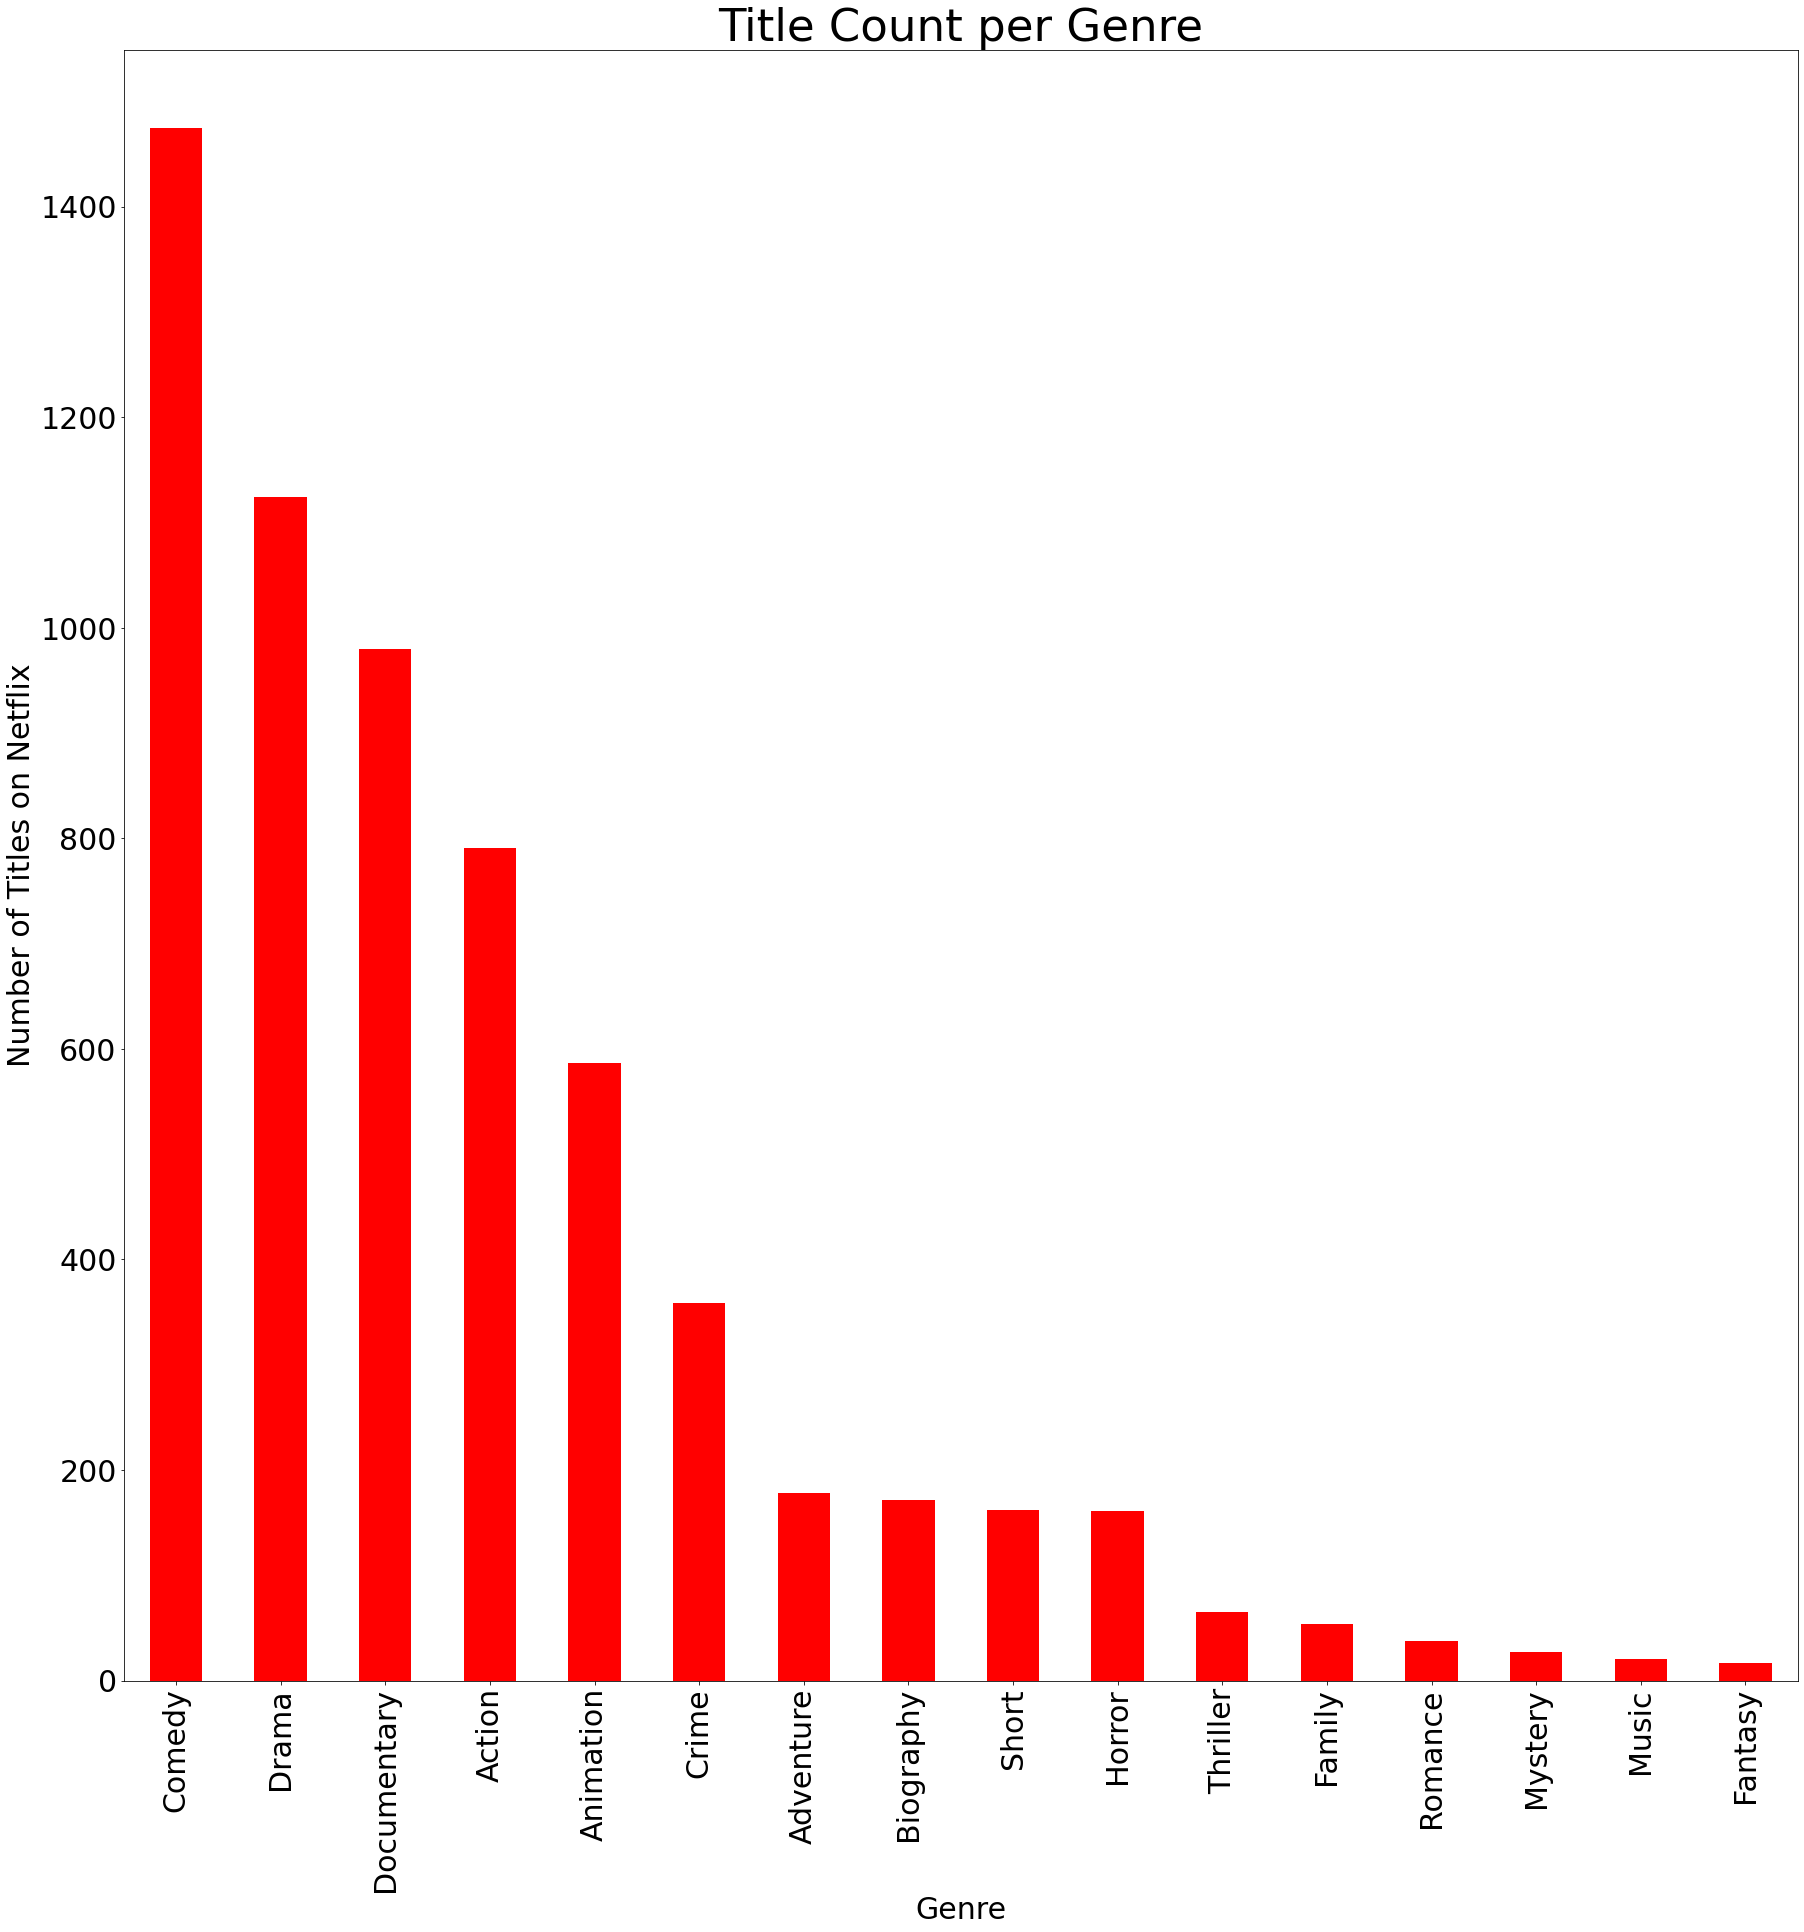

In [15]:
#graph your findings
plotting_genre_popularity= genre_popularity.plot.bar(figsize=(30,30),color='r', fontsize= 16)
genre_popularity
#add titles and labels 
plt.xlabel("Genre",fontsize = 30)
plt.ylabel("Number of Titles on Netflix",fontsize = 30)
plt.title("Title Count per Genre",fontsize = 45)
plt.xticks(fontsize= 30 ) 
plt.yticks(fontsize= 30 ) 
plt.savefig("../Graph Folder/Final Title Count per Genre.png")
plt.show()

# Research Question: 
# Which genre contains the highest average imdb ratings?

In [16]:

imdb_genre_df= imdb_genre_df[~imdb_genre_df["IMDB Rating"].str.contains('N/A')]

In [17]:
imdb_genre_df['IMDB Rating']= imdb_genre_df['IMDB Rating'].astype(float)

# Statistical Analysis of Genre and IMDB Rating

In [18]:
grouped_genre= imdb_genre_df.groupby("Genres")
imdb_mean= grouped_genre["IMDB Rating"].mean()
imdb_median= grouped_genre["IMDB Rating"].median()
imdb_variance= grouped_genre["IMDB Rating"].var()
imdb_sd= grouped_genre["IMDB Rating"].std()
imdb_sem= grouped_genre["IMDB Rating"].sem()

# Assemble the resulting series into a single summary dataframe.
imdb_summary_table= pd.DataFrame({
    "Mean":imdb_mean,
    "Median":imdb_median,
    "Variance":imdb_variance,
    "Standard Deviation":imdb_sd,
    "SEM":imdb_sem

})
imdb_summary_table

,Mean,Median,Variance,Standard Deviation,SEM
Genres,,,,,
Action,6.104987,6.20,1.592536,1.261957,0.045127
Adventure,6.336207,6.40,1.487872,1.219784,0.092472
Animation,6.568739,6.60,1.298173,1.139374,0.047351
Biography,7.025000,7.00,0.598728,0.773775,0.059000
Comedy,6.338562,6.40,1.471583,1.213088,0.031748
Crime,6.754469,6.90,1.331058,1.153715,0.060976
Documentary,7.089028,7.20,0.847128,0.920396,0.029752
Drama,6.554239,6.60,1.276663,1.129895,0.034114
Family,6.207547,6.20,1.425711,1.194031,0.164013


In [19]:
#Do a groupby function to find each genre's average IMDB rating
groups= imdb_genre_df.groupby("Genres").mean()
groups = groups.sort_values(["IMDB Rating"], ascending=False)
groups

,IMDB Rating
Genres,
Documentary,7.089028
Short,7.061446
Biography,7.025000
Music,6.880000
Crime,6.754469
Animation,6.568739
Drama,6.554239
Comedy,6.338562
Adventure,6.336207


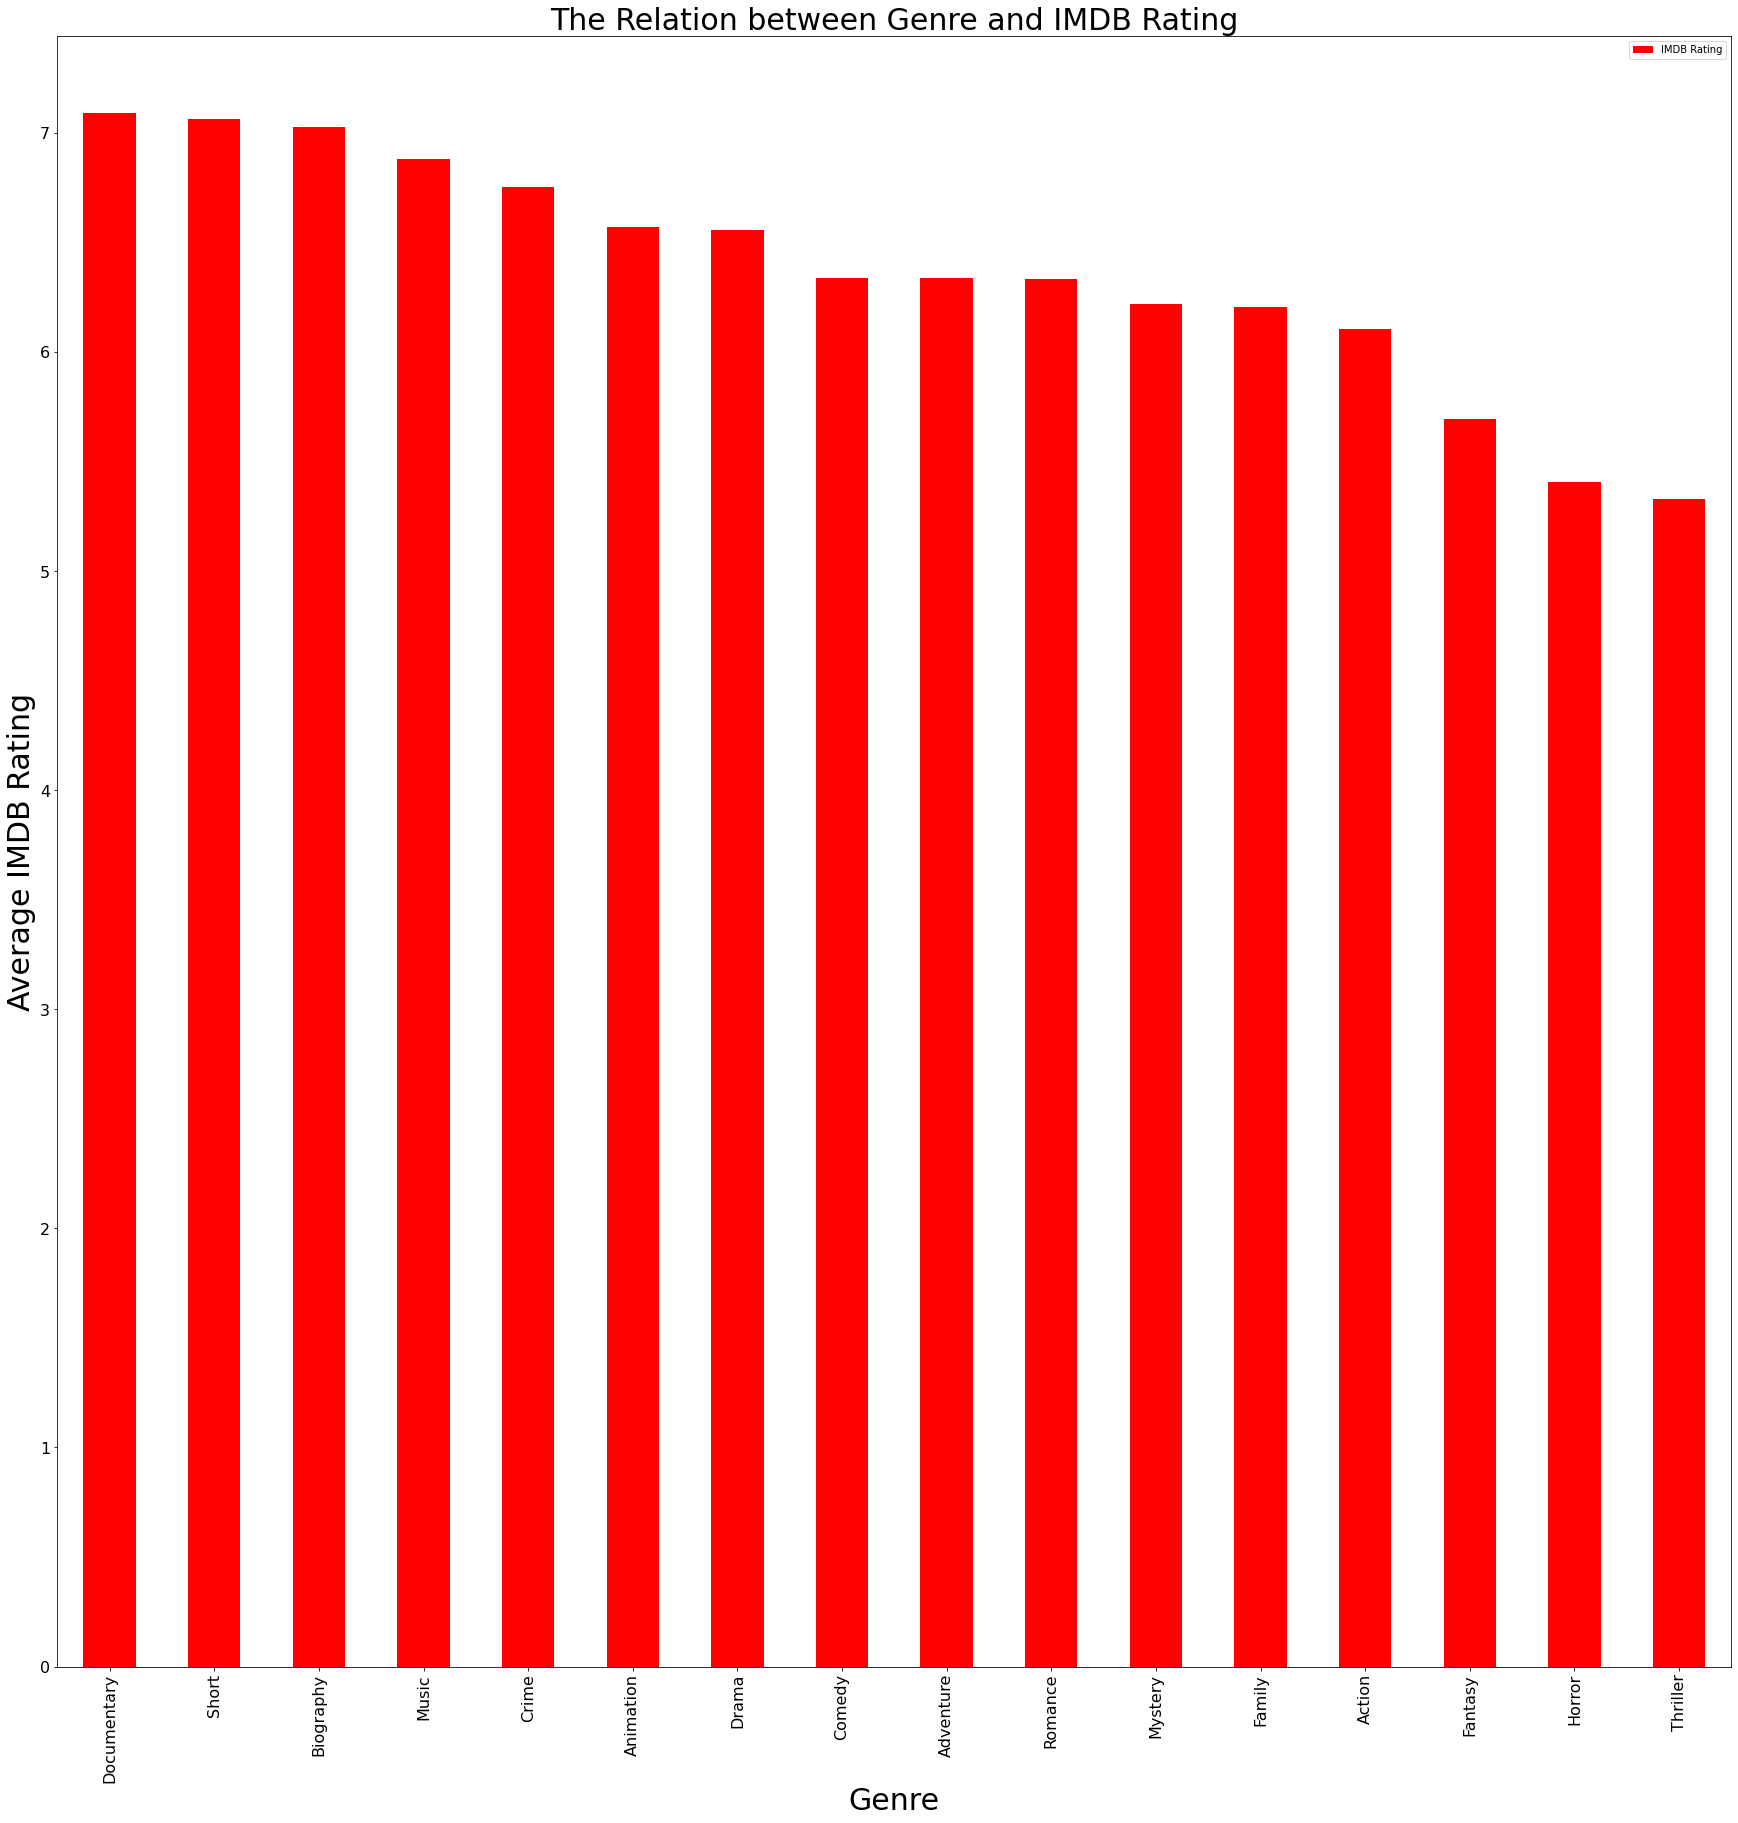

<Figure size 432x288 with 0 Axes>

In [119]:
#create a bar graph that displays each genre and its overall IMDB rating 
plotting_genre_averages= groups.plot.bar(figsize=(30,30),color='r', fontsize= 16)
groups
#add titles and labels 
plt.xlabel("Genre",fontsize = 30)
plt.ylabel("Average IMDB Rating",fontsize = 30)
plt.title("The Relation between Genre and IMDB Rating",fontsize = 30)
plt.show()
plt.savefig("../Graph Folder/Final Relation between Genre and IMDB Rating.png")
plt.show()

# Further genre analysis 
The graphs below will display the relationship between genre, ratings, and user ratings. Out of those top 5 genres we will find the amount of titles are classified under each rating (G, PG, PG13,R, NR, etc.)

In [20]:
imdb_genre_df= imdb_genre_df[imdb_genre_df != 'N/A']

In [21]:
rating_column= imdb_genre_df.loc[:, "Rating"]
new_df= pd.DataFrame({"Rating": rating_column})
new_df= new_df.dropna()
Rating_counts= new_df['Rating'].value_counts()

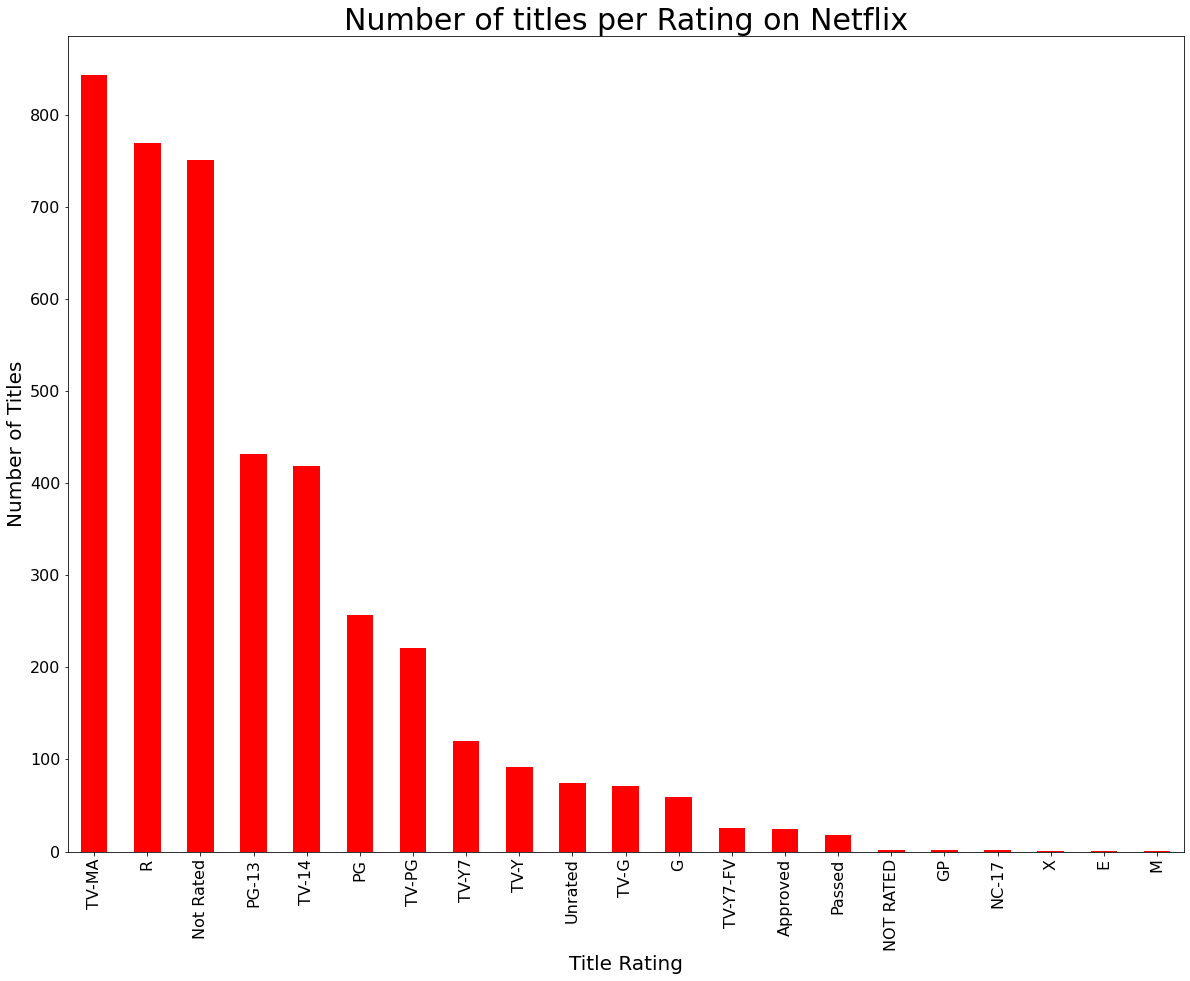

In [22]:
plotting= Rating_counts.plot.bar(figsize=(20,15),color='r', fontsize= 16,)
plt.xlabel("Title Rating",fontsize = 20)
plt.ylabel("Number of Titles",fontsize = 20)
plt.title("Number of titles per Rating on Netflix",fontsize = 30)
Rating_counts
plt.savefig("../Graph Folder/Final Number of titles per Rating on Netflix.png")
plt.show()

In [23]:
#Create a new data frame only displaying the top 5 genres 
#Documentary	7.089133
#Short	7.061446
#Biography	7.025000
#Music	6.880000
#Crime	6.754190
#Do a groupby function to find each genre's average IMDB rating

documentary_group= imdb_genre_df[imdb_genre_df['Genres']== 'Documentary']
short_group= imdb_genre_df[imdb_genre_df['Genres']== 'Short']
biography_group= imdb_genre_df[imdb_genre_df['Genres']== 'Biography']
music_group= imdb_genre_df[imdb_genre_df['Genres']== 'Music']
crime_group= imdb_genre_df[imdb_genre_df['Genres']== 'Crime']

In [24]:
#Finding out how many of each rating is present in each top 5 genre
documentary_group['Rating'].value_counts()

TV-MA        141
Not Rated    116
TV-14         79
TV-PG         63
R             30
PG-13         29
PG            23
Unrated       11
TV-G          11
G              8
Approved       2
TV-Y           1
E              1
GP             1
Name: Rating, dtype: int64

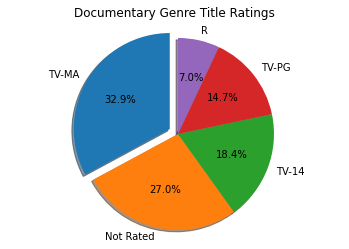

In [25]:
# Pie chart
labels = 'TV-MA', 'Not Rated', 'TV-14', 'TV-PG', 'R'
sizes = [141, 116, 79, 63, 30 ]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Documentary Genre Title Ratings')
plt.savefig("../Graph Folder/Final Top 5 by rating Documentary.png")
plt.show()

In [26]:
#Finding out how many of each rating is present in each top 5 genre
short_group['Rating'].value_counts()

Not Rated    7
TV-G         3
TV-14        2
TV-MA        2
R            1
Name: Rating, dtype: int64

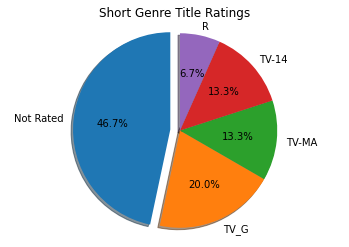

In [27]:
# Pie chart
labels = 'Not Rated', 'TV_G','TV-MA', 'TV-14', 'R'
sizes = [7, 3, 2, 2, 1]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Short Genre Title Ratings')
plt.savefig("../Graph Folder/Final Top 5 by rating Short.png")
plt.show()

In [28]:
biography_group['Rating'].value_counts()

R            53
PG-13        31
TV-MA        21
Not Rated    18
PG           11
TV-14         7
TV-PG         6
Approved      1
Unrated       1
Passed        1
Name: Rating, dtype: int64

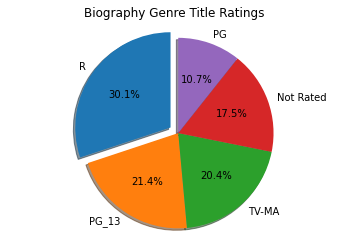

In [29]:
# Pie chart
labels = 'R', 'PG_13','TV-MA', 'Not Rated', 'PG'
sizes = [31, 22, 21, 18, 11]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Biography Genre Title Ratings')
plt.savefig("../Graph Folder/Final Top 5 by rating Biography.png")
plt.show()

In [30]:
music_group['Rating'].value_counts()

TV-14        3
TV-PG        3
R            1
TV-MA        1
Not Rated    1
Name: Rating, dtype: int64

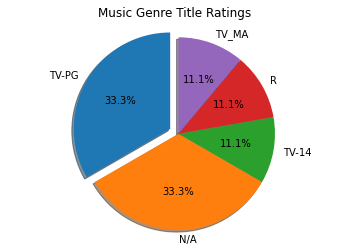

In [31]:
# Pie chart
labels = 'TV-PG', 'N/A','TV-14', 'R', 'TV_MA' 
sizes = [3, 3, 1, 1, 1]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Music Genre Title Ratings')
plt.savefig("../Graph Folder/Final Top 5 by rating Music.png")
plt.show()

In [32]:
crime_group['Rating'].value_counts()

R            81
TV-MA        79
Not Rated    54
TV-14        22
PG-13         9
Unrated       6
Passed        5
Approved      5
TV-PG         3
PG            3
NOT RATED     1
X             1
GP            1
Name: Rating, dtype: int64

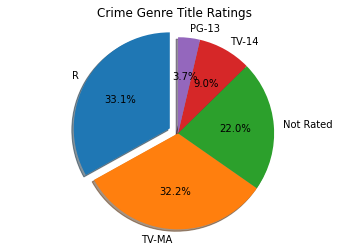

In [33]:
# Pie chart
labels = 'R', 'TV-MA','Not Rated', 'TV-14', 'PG-13'
sizes = [81, 79, 54, 22, 9]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Crime Genre Title Ratings')
plt.savefig("../Graph Folder/Final Top 5 by rating Crime.png")
plt.show()

# OVERALL FINDINGS FOR THE TOP 5 GENRES & THEIR TITLE RATINGS (PG, PG-13, R, etc.)


In [34]:
print("HIGHEST SCORING GENRES AND THEIR MOST POPULAR RATING")
print("-------------------------")
print("DOCUMENTARY: TV-MA")
print("-------------------------")
print("SHORT: Not Rated")
print("-------------------------")
print("BIOGRAPHY: R")
print("-------------------------")
print("MUSIC: TV-PG")
print("-------------------------")
print("CRIME: R")
print("-------------------------")

HIGHEST SCORING GENRES AND THEIR MOST POPULAR RATING
-------------------------
DOCUMENTARY: TV-MA
-------------------------
SHORT: Not Rated
-------------------------
BIOGRAPHY: R
-------------------------
MUSIC: TV-PG
-------------------------
CRIME: R
-------------------------


**After running the analysis above on the genre with the most titles instead of the genre with highest average IMDB score, it is interesting to note that......
The top 5 most frequent ratings are TV-MA,Not Rated,R, PG_13,TV-14. What this shows us is that the most produced genre is typically geared towards a more adult crowd.**

In [35]:
comedy_group= imdb_genre_df[imdb_genre_df['Genres']== 'Comedy']
comedy_group['Rating'].value_counts()

TV-MA        297
Not Rated    176
R            160
PG-13        112
TV-14        103
TV-PG         59
PG            50
TV-G          24
Unrated       20
G              9
Approved       6
Passed         3
TV-Y7          3
NC-17          1
TV-Y           1
Name: Rating, dtype: int64

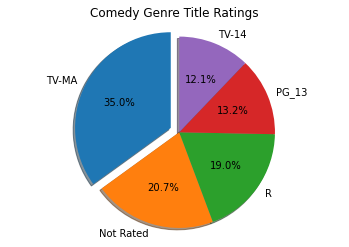

In [36]:
# Pie chart
labels = 'TV-MA','Not Rated','R', 'PG_13','TV-14'
sizes = [297, 176, 161, 112, 103]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Comedy Genre Title Ratings')
plt.savefig("../Graph Folder/Final Top 5 by popularity Comedy.png")
plt.show()

# Further statistical investigating 
- To better portray our data, we created histograms of the most produces genre: (Comedy,) and the highest rating genre:Documentary. This will give us a better idea of the scoring components and why they fell where they did in the ratings 

In [37]:
#making df for each genre for statsical visualization 
comedy_df = imdb_genre_df.loc[imdb_genre_df['Genres'] == 'Comedy']
doc_df = imdb_genre_df.loc[imdb_genre_df['Genres'] == 'Documentary']

<function matplotlib.pyplot.show(close=None, block=None)>

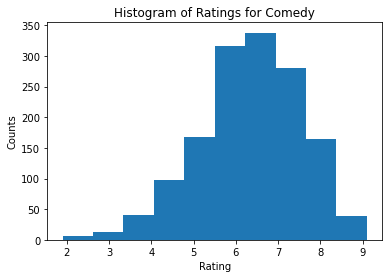

In [38]:
#comedy distribution
comedy_rating = comedy_df["IMDB Rating"]
plt.hist(comedy_rating)
plt.xlabel("Rating")
plt.ylabel("Counts")
plt.title("Histogram of Ratings for Comedy")
plt.savefig('../Graph Folder/Final Comedy ratings histogram')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

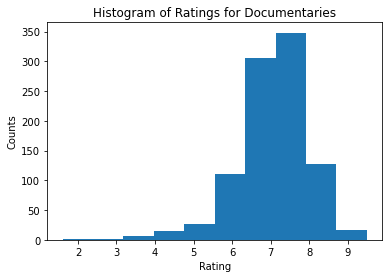

In [39]:
#doc distribution
doc_rating = doc_df["IMDB Rating"]
plt.hist(doc_rating)
plt.xlabel("Rating")
plt.ylabel("Counts")
plt.title("Histogram of Ratings for Documentaries")
plt.savefig('../Graph Folder/Final Documentary ratings histogram')
plt.show

# Research Question:
# Does the year affect production frequency?
- We will no turn our attention back to the original dataframe Netflix Titles to see display how many titles were produced per year 

In [40]:
#making df to see how many movies/shows made per year
year_df = Netflix_Titles.loc[:, ["title", "release_year"]]
year_totals = year_df.value_counts()
year_group = year_totals.groupby('release_year')
year_count = year_group.count()
year_count_df = year_count.to_frame()
year_count_df.columns = ["Count"]
year_count_df

,Count
release_year,
1925,1
1942,2
1943,3
1944,3
1945,3
...,...
2017,1012
2018,1121
2019,996


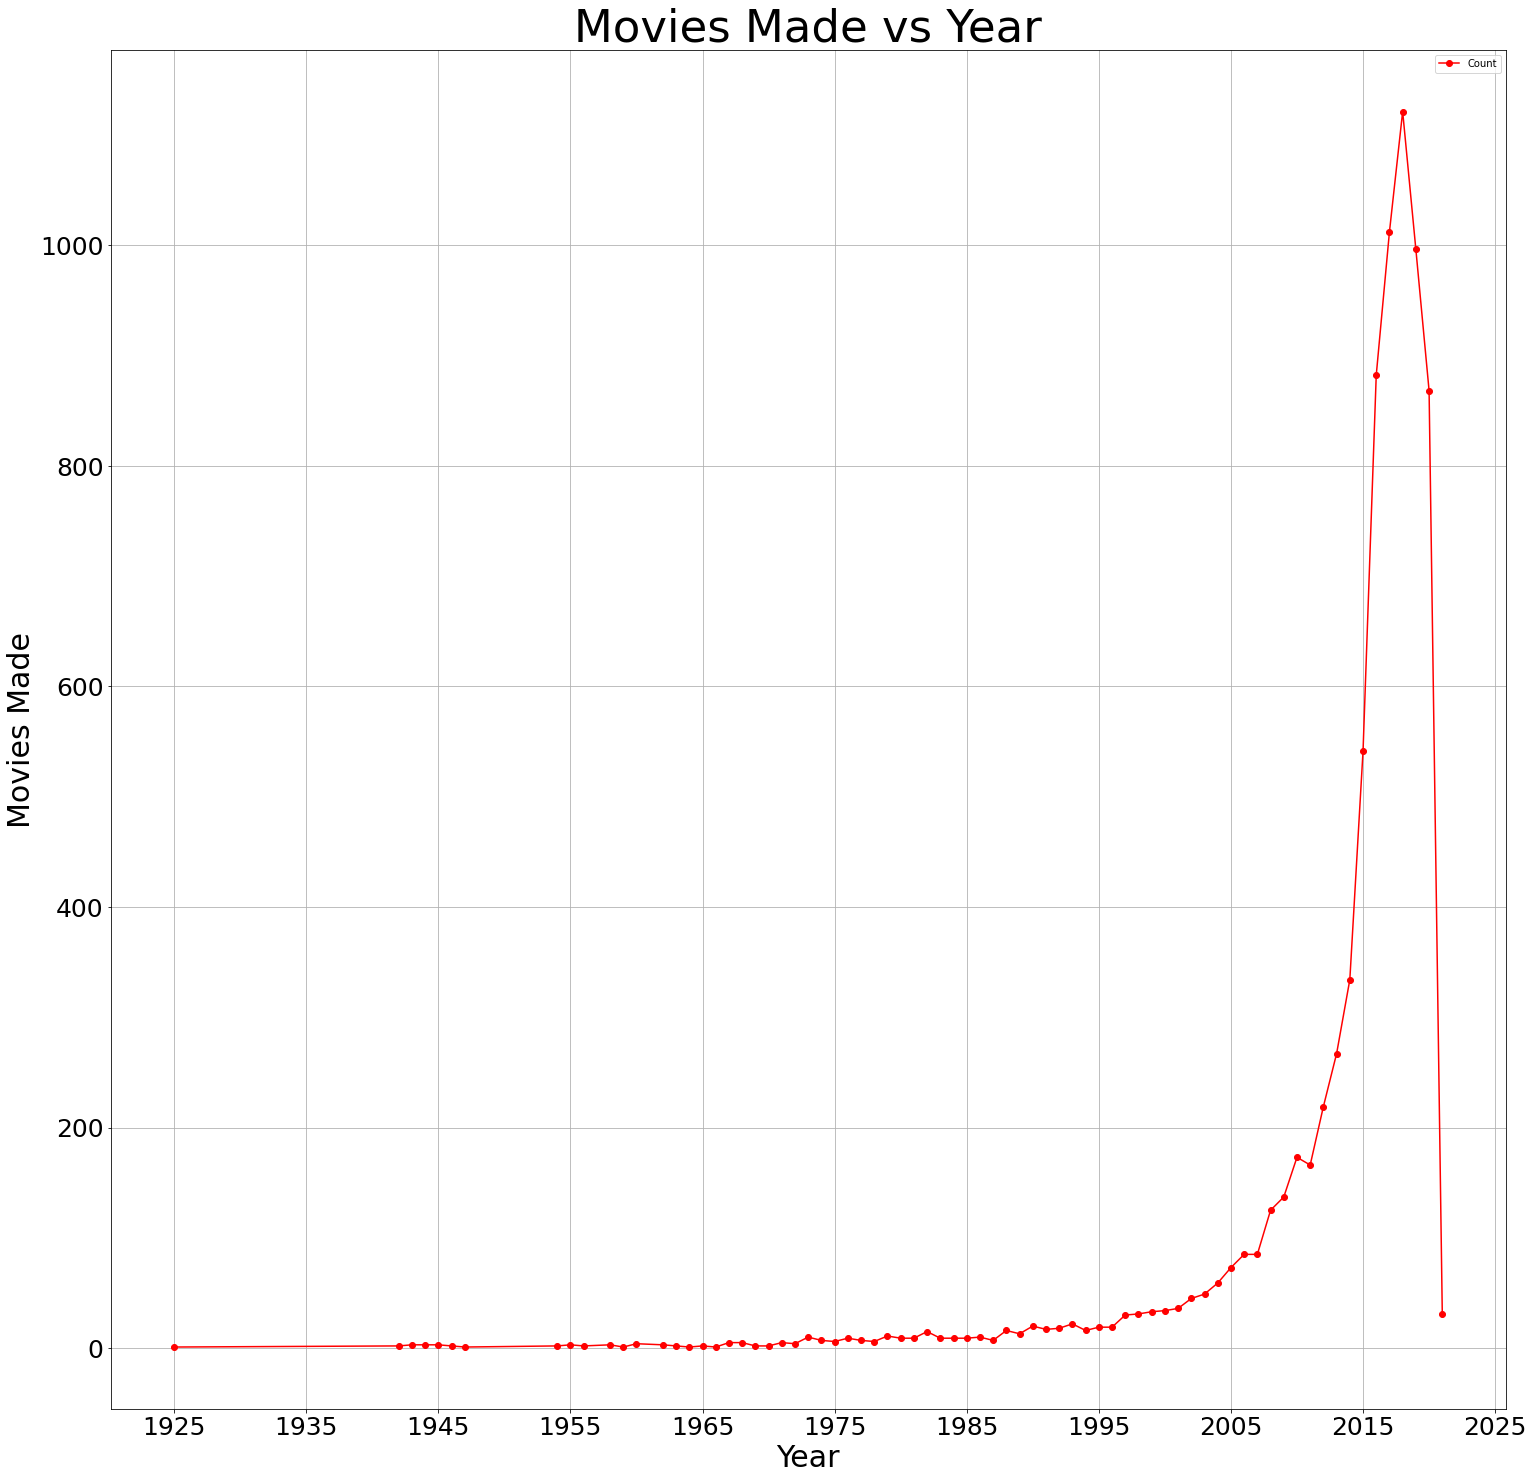

In [41]:
#making line graph of the year data 
x_axis = np.arange(len(year_count_df))
year_count_df.plot.line(figsize= (25,25), color='r', marker = 'o' )
plt.title('Movies Made vs Year', fontsize= 45)
plt.xlabel('Year', fontsize= 30)
plt.ylabel('Movies Made', fontsize= 30)
plt.grid(True)
plt.xticks(range(1925,2030, 10),fontsize= 25)
plt.yticks(fontsize= 25 ) 
plt.savefig("../Graph Folder/Final Movies Made Per Year.png")
plt.show()

# Further Analysis of Release Year as it relates to IMDB Rating 
To further support our analysis, we will merge a title's release date with it's IMDB rating in order to see which year held the highest rated titles.

In [42]:
Netflix_Titles.rename(columns={'title': 'Title'}, inplace=True)

In [43]:
#merging the data into a new frame 
merge_df = pd.merge(imdb_genre_df, Netflix_Titles, on = "Title")

#getting just the info i want 
info_df = merge_df[["Title", "IMDB Rating", "release_year"]]

#renaming data frame 
info_df = info_df.rename(columns={"release_year": "Release Year"})

#sorting by year 
info_df = info_df.sort_values('Release Year', ascending = True)
info_df

,Title,IMDB Rating,Release Year
4184,The Battle of Midway,6.1,1942
3335,Prelude to War,7.0,1942
5011,Tunisian Victory,6.7,1944
4609,The Negro Soldier,5.9,1944
3641,San Pietro,6.7,1945
...,...,...,...
962,Cobra Kai,8.6,2021
1203,Disenchantment,7.2,2021
1577,Gabby's Dollhouse,6.9,2021
865,Charming,5.6,2021


<function matplotlib.pyplot.show(close=None, block=None)>

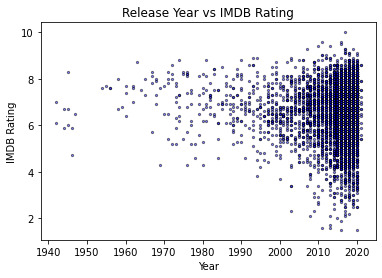

In [58]:
#making scatter plot
x_val = info_df["Release Year"]
y_val = info_df["IMDB Rating"]
plt.scatter(x_val, y_val, marker = '.', facecolors = 'b', 
            edgecolors = 'k', s = 20, alpha = 0.5)
plt.title("Release Year vs IMDB Rating")
plt.xlabel("Year")
plt.ylabel("IMDB Rating")

#save and print 
plt.savefig('../Graph Folder/Final Release Year vs IMDB Rating.png')
plt.show

In [59]:
#Correlation coefficient
corr_coeff2 = round(st.pearsonr(x_val, y_val)[0], 2)
corr_coeff2

-0.07

<function matplotlib.pyplot.show(close=None, block=None)>

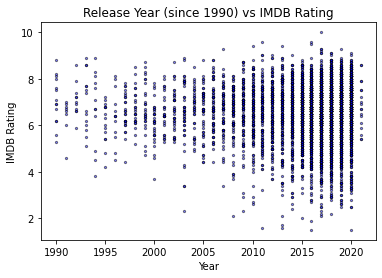

In [56]:
#getting data from 1990 and on 
since_1990 = info_df.loc[info_df['Release Year'] >= 1990]
since_1990

#making scatter plot
x_val = since_1990["Release Year"]
y_val = since_1990["IMDB Rating"]
plt.scatter(x_val, y_val, marker = '.', facecolors = 'b', 
            edgecolors = 'k', s = 20, alpha = 0.5)
plt.title("Release Year (since 1990) vs IMDB Rating")
plt.xlabel("Year")
plt.ylabel("IMDB Rating")

#save and print 
plt.savefig('../Graph Folder/Final Release Year vs IMDB Rating since 1990.png')
plt.show

In [57]:
#Correlation coefficient
corr_coeff = round(st.pearsonr(x_val, y_val)[0], 2)
corr_coeff

-0.03

# Research Question:
# Which country produces the most movies/tv shows?

In [160]:
#Load data frame that is organized by country
UniqueCountry = "../Data/UniqueCountry.csv"
UniqueCountry = pd.read_csv(UniqueCountry)

In [161]:
#Netflix_Titles["type"].pd.get_dummies()
pd.get_dummies(UniqueCountry, columns=['type'])

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type_Movie,type_TV Show
0,s1,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,8/14/20,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,0,1
1,s2,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,12/23/16,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,1,0
2,s3,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,12/20/18,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",1,0
3,s4,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,11/16/17,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",1,0
4,s5,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,1/1/20,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9565,s7785,Zulu Man in Japan,NaN,Nasty C,NaN,9/25/20,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",1,0
9566,s7786,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,10/31/20,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,0,1
9567,s7787,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,United Kingdom,3/1/20,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,1,0
9568,s7787,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,Canada,3/1/20,2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,1,0


In [163]:
country_column= UniqueCountry.loc[:, "country"]
type_column= UniqueCountry.loc[:, "type"]

In [164]:
country_column
new_df= pd.DataFrame({"Country": country_column, "Type": type_column})
new_df= new_df.dropna()
new_df
by_country = new_df['Country'].value_counts()
by_country
by_country_df = by_country.to_frame()
by_country.head(10)

United States     3297
India              990
United Kingdom     723
Canada             412
France             349
Japan              287
Spain              215
South Korea        212
Germany            199
Mexico             154
Name: Country, dtype: int64

In [165]:
Netflix_Titles = pd.get_dummies(UniqueCountry, columns=['type'])
Netflix_Titles[['type_Movie','type_TV Show','country']].groupby('country').sum()
UniqueCountry.groupby(['country','type']).count().sort_values('country',ascending=False)
type_df = UniqueCountry.groupby(["country", "type"]).sum()
type_df

,,release_year
country,type,
Afghanistan,Movie,2016
Albania,Movie,2018
Algeria,Movie,3999
Angola,Movie,2020
Argentina,Movie,128992
...,...,...
Venezuela,Movie,6040
Vietnam,Movie,10084
West Germany,Movie,5933


In [166]:
new_df= pd.DataFrame({"Country": country_column, "Type": type_column})
new_df= new_df.dropna()
new_df
by_country = new_df['Country'].value_counts()
by_country
by_country_df = by_country.to_frame()
by_country.head(10)

United States     3297
India              990
United Kingdom     723
Canada             412
France             349
Japan              287
Spain              215
South Korea        212
Germany            199
Mexico             154
Name: Country, dtype: int64

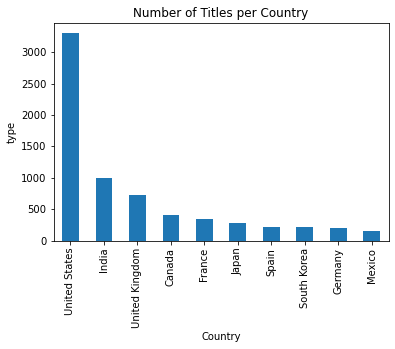

<Figure size 432x288 with 0 Axes>

In [174]:
# Create a bar chart based off of the group series from before
by_country_chart = by_country.head(10).plot(kind='bar')

# Set the xlabel and ylabel using class methods
by_country_chart.set_xlabel("Country")
by_country_chart.set_ylabel("type")

plt.title("Number of Titles per Country")
plt.savefig('../Graph Folder/Final Number of Titles per Country BAR.png')
plt.show()
plt.tight_layout()

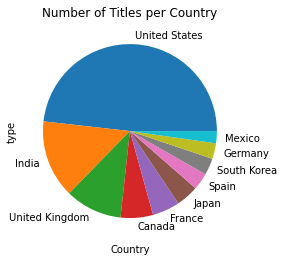

<Figure size 432x288 with 0 Axes>

In [173]:
# Create a bar chart based off of the group series from before
by_country_chart = by_country.head(10).plot(kind='pie')

# Set the xlabel and ylabel using class methods
by_country_chart.set_xlabel("Country")
by_country_chart.set_ylabel("type")
plt.title("Number of Titles per Country")
plt.savefig('../Graph Folder/Final Number of Titles per Country PIE.png')
plt.show()
plt.tight_layout()

In [171]:
print("The United States produces the most titles!!")

The United States produces the most titles!!


In [169]:
genre_df = UniqueCountry.loc[:, "country"]
updated_genre_df = genre_df.str.split(',', expand = True)
updated_genre_df
#updated_genre_df.columns
primary_genre = updated_genre_df[0].value_counts()
primary_genre_df = primary_genre.to_frame()
primary_genre_df
primary_genre_df.columns
primary_genre_df.columns = ["Total"]
primary_genre_df

,Total
United States,3297
India,990
United Kingdom,723
Canada,412
France,349
...,...
Kazakhstan,1
Sri Lanka,1
Syria,1
Dominican Republic,1


In [170]:
Netflix_Titles = pd.get_dummies(UniqueCountry, columns=['type'])
Netflix_Titles[['type_Movie','type_TV Show','country']].groupby('country').sum()
UniqueCountry.groupby(['country','type']).count().sort_values('country',ascending=False)
type_df = UniqueCountry.groupby(["country", "type"]).sum()
type_df

,,release_year
country,type,
Afghanistan,Movie,2016
Albania,Movie,2018
Algeria,Movie,3999
Angola,Movie,2020
Argentina,Movie,128992
...,...,...
Venezuela,Movie,6040
Vietnam,Movie,10084
West Germany,Movie,5933
